# Functional Capstone Project - Data & Analytics



## Business Context

**Infini Telco** is a prominent player in the telco industry with a strong presence in Malaysia. Specializing in B2B sales, they serve as a vital link in the supply chain, facilitating the distribution of telecommunication and technology products to retailers, service providers, and other businesses across the continent. 

Despite their market dominance and expansive product offerings, the company faces critical business challenge related to marketing strategy. A key aspect of this involves the ***identification and segmentation of their customer base into well-defined segments based on discernible patterns in product purchase behaviour and understand their product portfolio.*** By understanding the distinct needs, preferences, and purchasing habits of different customer segments, the client can develop targeted marketing strategies that cater to the specific needs of each segment, enhancing customer satisfaction and loyalty, driving revenue growth.




## Business Challenges

- No streamlined process to handle data and data is only available in chunks
- Limited intel on customer purchase patterns to drive targeted marketing
- Inadequate product insights across different customer groups


## Project Objectives

The business needs your help as a ***data analyst*** to overcome these challenges. Apply your data analytics skillset learnt.



### 1. Data Preprocessing

Data preparation is a critical process first step, involving the gathering, cleaning, transforming, and organizing of raw data into a format suitable for analysis. This step is essential for ensuring the quality and reliability of the insights derived from the data.

Here, the transaction data is provided from June 2020 to December 2022, which are stored across three separate csv files. The dataset are:

- Transactions_1.csv
- Transactions_2.csv
- Transactions_3.csv

***Task 1.1: Combine the transaction data files***

Find a way to combine the above data together into a singular dataframe, that will contain all the transactions at one place. Name this singular dataframe df_Txn_full.

In [1]:
#Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import warnings
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the dataset
df1 = pd.read_csv('Transactions_1.csv')
df2 = pd.read_csv('Transactions_2.csv')
df3 = pd.read_csv('Transactions_3.csv')

In [3]:
df1.head()

,INDEX,INVOICE_NUMBER,INVOICE_ITEM,DOCUMENT_DATE,CUSTOMER_NUMBER,Main_account,Main_account_name,Main_resposible_employee_name,PRODUCT,Position_type_order_line,GROSS_TURNOVER,AMOUNT
0,33806,124289578,10,2022-10-01,14816,14816,Customer Group_0,Responsible Employee_0,000000000000100095,ZSV,0.0,1
1,65627,124317609,230,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,000000000000100095,ZSV,0.0,1
2,65628,124317609,250,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,000000000000100095,ZSV,0.0,0
3,65629,124317609,270,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,000000000000100095,ZSV,0.0,1
4,65630,124317609,290,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,000000000000100095,ZSV,0.0,1


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   INDEX                          100000 non-null  int64  
 1   INVOICE_NUMBER                 100000 non-null  int64  
 2   INVOICE_ITEM                   100000 non-null  int64  
 3   DOCUMENT_DATE                  100000 non-null  object 
 4   CUSTOMER_NUMBER                100000 non-null  int64  
 5   Main_account                   100000 non-null  int64  
 6   Main_account_name              100000 non-null  object 
 7   Main_resposible_employee_name  100000 non-null  object 
 8   PRODUCT                        100000 non-null  object 
 9   Position_type_order_line       100000 non-null  object 
 10  GROSS_TURNOVER                 100000 non-null  float64
 11  AMOUNT                         100000 non-null  int64  
dtypes: float64(1), int64(6), object

In [5]:
# Use the 'mixed' strategy to handle different date formats in the same column
df1['DOCUMENT_DATE'] = pd.to_datetime(
    df1['DOCUMENT_DATE'], 
    format='mixed',  # Tells pandas to infer the format for each entry
    dayfirst=True    # Helps pandas correctly interpret DD/MM/YYYY vs MM/DD/YYYY
)
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   INDEX                          100000 non-null  int64         
 1   INVOICE_NUMBER                 100000 non-null  int64         
 2   INVOICE_ITEM                   100000 non-null  int64         
 3   DOCUMENT_DATE                  100000 non-null  datetime64[ns]
 4   CUSTOMER_NUMBER                100000 non-null  int64         
 5   Main_account                   100000 non-null  int64         
 6   Main_account_name              100000 non-null  object        
 7   Main_resposible_employee_name  100000 non-null  object        
 8   PRODUCT                        100000 non-null  object        
 9   Position_type_order_line       100000 non-null  object        
 10  GROSS_TURNOVER                 100000 non-null  float64       
 11  A

In [6]:
df2.head()

,INDEX,INVOICE_NUMBER,INVOICE_ITEM,DOCUMENT_DATE,CUSTOMER_NUMBER,Main_account,Main_account_name,Main_resposible_employee_name,PRODUCT,Position_type_order_line,GROSS_TURNOVER,AMOUNT
0,124526,124289549,50,2022-10-01,23388,23388,Customer Group_283,Responsible Employee_15,000000000000100095,ZSV,0.0,0
1,124532,124289549,210,2022-10-01,23388,23388,Customer Group_283,Responsible Employee_15,000000000000100095,ZSV,0.0,0
2,124541,124289549,130,2022-10-01,23388,23388,Customer Group_283,Responsible Employee_15,000000000000100095,ZSV,0.0,0
3,124543,124289549,290,2022-10-01,23388,23388,Customer Group_283,Responsible Employee_15,000000000000100095,ZSV,0.0,1
4,124558,124289549,10,2022-10-01,23388,23388,Customer Group_283,Responsible Employee_15,000000000000100095,ZSV,0.0,0


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   INDEX                          900000 non-null  int64  
 1   INVOICE_NUMBER                 900000 non-null  int64  
 2   INVOICE_ITEM                   900000 non-null  int64  
 3   DOCUMENT_DATE                  900000 non-null  object 
 4   CUSTOMER_NUMBER                900000 non-null  int64  
 5   Main_account                   900000 non-null  int64  
 6   Main_account_name              900000 non-null  object 
 7   Main_resposible_employee_name  900000 non-null  object 
 8   PRODUCT                        900000 non-null  object 
 9   Position_type_order_line       900000 non-null  object 
 10  GROSS_TURNOVER                 900000 non-null  float64
 11  AMOUNT                         900000 non-null  int64  
dtypes: float64(1), int64(6), objec

In [8]:
df2['DOCUMENT_DATE'] = pd.to_datetime(df2['DOCUMENT_DATE'], format='%Y-%m-%d')
print(df2['DOCUMENT_DATE'].dtype)

datetime64[ns]


In [9]:
df3.head()

,INDEX,INVOICE_NUMBER,INVOICE_ITEM,DOCUMENT_DATE,CUSTOMER_NUMBER,Main_account,Main_account_name,Main_resposible_employee_name,PRODUCT,Position_type_order_line,GROSS_TURNOVER,AMOUNT
0,1035712,124317627,10,2022-10-01,106033,106033,Customer Group_2,Responsible Employee_0,000000000000100095,ZSV,0.0,1
1,1035713,124317627,30,2022-10-01,106033,106033,Customer Group_2,Responsible Employee_0,000000000000100095,ZSV,0.0,1
2,1035714,124317627,50,2022-10-01,106033,106033,Customer Group_2,Responsible Employee_0,000000000000100095,ZSV,0.0,0
3,1035715,124317627,70,2022-10-01,106033,106033,Customer Group_2,Responsible Employee_0,000000000000100095,ZSV,0.0,0
4,1035716,124317627,90,2022-10-01,106033,106033,Customer Group_2,Responsible Employee_0,000000000000100095,ZSV,0.0,1


In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353671 entries, 0 to 353670
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   INDEX                          353671 non-null  int64  
 1   INVOICE_NUMBER                 353671 non-null  int64  
 2   INVOICE_ITEM                   353671 non-null  int64  
 3   DOCUMENT_DATE                  353671 non-null  object 
 4   CUSTOMER_NUMBER                353671 non-null  int64  
 5   Main_account                   353671 non-null  int64  
 6   Main_account_name              353671 non-null  object 
 7   Main_resposible_employee_name  353671 non-null  object 
 8   PRODUCT                        353671 non-null  object 
 9   Position_type_order_line       353671 non-null  object 
 10  GROSS_TURNOVER                 353671 non-null  float64
 11  AMOUNT                         353671 non-null  int64  
dtypes: float64(1), int64(6), objec

In [11]:
df3['DOCUMENT_DATE'] = pd.to_datetime(df3['DOCUMENT_DATE'], format='%Y-%m-%d')
print(df3['DOCUMENT_DATE'].dtype)

datetime64[ns]


In [12]:
## Combine them using 
df_Txn_full = pd.concat([df1, df2, df3], ignore_index=True)
df_Txn_full

,INDEX,INVOICE_NUMBER,INVOICE_ITEM,DOCUMENT_DATE,CUSTOMER_NUMBER,Main_account,Main_account_name,Main_resposible_employee_name,PRODUCT,Position_type_order_line,GROSS_TURNOVER,AMOUNT
0,33806,124289578,10,2022-10-01,14816,14816,Customer Group_0,Responsible Employee_0,000000000000100095,ZSV,0.000,1
1,65627,124317609,230,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,000000000000100095,ZSV,0.000,1
2,65628,124317609,250,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,000000000000100095,ZSV,0.000,0
3,65629,124317609,270,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,000000000000100095,ZSV,0.000,1
4,65630,124317609,290,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,000000000000100095,ZSV,0.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1353666,1348783,123561680,240,2022-05-02,994332,994332,Customer Group_4555,Responsible Employee_48,000000007857002746,ZKSK,207336.000,50
1353667,1348830,123700628,310,2022-05-02,994332,994332,Customer Group_4555,Responsible Employee_48,000000010001166712,ZSKA,2512.928,1
1353668,1348878,124470380,230,2022-10-10,994332,994332,Customer Group_4555,Responsible Employee_48,000000010000836860,ZSKA,22910.000,1580
1353669,1349192,123461909,300,2022-05-02,994332,994332,Customer Group_4555,Responsible Employee_48,000000010000467409,ZSKA,16.709,1


#### data exploration

In [13]:
df_Txn_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353671 entries, 0 to 1353670
Data columns (total 12 columns):
 #   Column                         Non-Null Count    Dtype         
---  ------                         --------------    -----         
 0   INDEX                          1353671 non-null  int64         
 1   INVOICE_NUMBER                 1353671 non-null  int64         
 2   INVOICE_ITEM                   1353671 non-null  int64         
 3   DOCUMENT_DATE                  1353671 non-null  datetime64[ns]
 4   CUSTOMER_NUMBER                1353671 non-null  int64         
 5   Main_account                   1353671 non-null  int64         
 6   Main_account_name              1353671 non-null  object        
 7   Main_resposible_employee_name  1353671 non-null  object        
 8   PRODUCT                        1353671 non-null  object        
 9   Position_type_order_line       1353671 non-null  object        
 10  GROSS_TURNOVER                 1353671 non-null  float

In [14]:
df_Txn_full.duplicated().sum()

np.int64(0)

In [15]:
df_Txn_full.describe()

,INDEX,INVOICE_NUMBER,INVOICE_ITEM,DOCUMENT_DATE,CUSTOMER_NUMBER,Main_account,GROSS_TURNOVER,AMOUNT
count,1.353671e+06,1.353671e+06,1.353671e+06,1353671,1.353671e+06,1.353671e+06,1.353671e+06,1.353671e+06
mean,6.768360e+05,1.336890e+08,9.923483e+02,2022-06-22 07:13:27.103940864,1.691795e+05,1.808989e+05,1.083334e+03,7.772387e+01
min,1.000000e+00,2.041100e+05,1.000000e+00,2020-06-23 00:00:00,1.001400e+04,1.001400e+04,-2.585470e+05,-1.920600e+05
25%,3.384185e+05,1.232323e+08,4.000000e+01,2022-03-21 00:00:00,4.456100e+04,4.382200e+04,9.812400e+01,1.000000e+00
50%,6.768360e+05,1.237926e+08,2.000000e+02,2022-06-20 00:00:00,7.298200e+04,7.338500e+04,2.693392e+02,3.000000e+00
75%,1.015254e+06,1.243744e+08,1.000000e+03,2022-09-27 00:00:00,1.020540e+05,1.336600e+05,7.831995e+02,1.300000e+01
max,1.353671e+06,8.013028e+08,7.641000e+04,2022-12-31 00:00:00,9.999500e+05,9.999500e+05,9.589981e+05,2.480000e+05
std,3.907713e+05,8.132830e+07,2.564135e+03,NaN,2.408326e+05,2.531200e+05,5.054829e+03,7.958130e+02


**Validation checkpoints:**
Consider, you would have received some information from the business on:

- Gross Annual Turnover for this period to be ~$1.4B
  -- it can be identified by sum of the gross_turnover columns.
  
- The total unique products are ~190000
  -- it can be identified by unique the product
   
- The total customer base is ~7k
  -- it can be identified by unique the customer_number

***Task 1.1.1***:

Use the above information to validate the data creation process. This is to ensure that no records of data are lost in the process. 

In [16]:
df_Txn_full['GROSS_TURNOVER'].sum()

np.float64(1466478196.7235)

In [17]:
df_Txn_full.nunique()

INDEX                            1353671
INVOICE_NUMBER                    504473
INVOICE_ITEM                        3749
DOCUMENT_DATE                        605
CUSTOMER_NUMBER                     7130
Main_account                        6317
Main_account_name                   5800
Main_resposible_employee_name         94
PRODUCT                           191394
Position_type_order_line              51
GROSS_TURNOVER                    903683
AMOUNT                              3976
dtype: int64

***Task 1.2: Join the mapping files to the transaction data***


Mapping files contain supplementary detailed information that will be used for our analysis. 
Use these mapping files to join with the above transaction data to create the master dataset <br><br>
**List of mapping files and their primary keys:**<br>
1. Customer Characteristics : to be joined on Customer Number
2. Customer Type Mapping : to be joined on Main Account ID
3. Product Category Mapping : to be joined on Product ID

To ensure that the joins are performed accurately, it is a good practice to clean up the columns upon which the join is performed. 
Some recommended steps to clean up a column are:

- ensuring the values are of the same data type
- removing leading zeroes
- removing leading and trailing whitespaces etc.


***Task 1.2.1:***

Here, before, performing the joins, you have to perform an intermediary step to clean up the below columns based on the above recommended steps:

- customer_number
- Product
- Main_account
- Invoice_Number

*Hint: Check for any leading or trailing 0s or white spaces.*

In [18]:
df_Txn_full['CUSTOMER_NUMBER'] = (
    df_Txn_full['CUSTOMER_NUMBER']
    .astype(str)           # convert to string
    .str.strip()           # remove whitespace
    .str.lstrip('0')       # remove leading zeros
)
df_Txn_full['CUSTOMER_NUMBER'] = df_Txn_full['CUSTOMER_NUMBER'].astype(int)


In [19]:
df_Txn_full['PRODUCT'] = (
    df_Txn_full['PRODUCT']
    .astype(str)
    .str.strip()
    .str.lstrip('0')      
)

In [20]:
df_Txn_full['Main_account'] = (
    df_Txn_full['Main_account']
    .astype(str)
    .str.strip()
    .str.lstrip('0')
)

df_Txn_full['Main_account'] = df_Txn_full['Main_account'].astype(int)


In [21]:
df_Txn_full['INVOICE_NUMBER'] = (
    df_Txn_full['INVOICE_NUMBER']
    .astype(str)
    .str.strip()
    .str.lstrip('0')
)

df_Txn_full['INVOICE_NUMBER'] = df_Txn_full['INVOICE_NUMBER'].astype(int)


In [22]:
df_Txn_full


,INDEX,INVOICE_NUMBER,INVOICE_ITEM,DOCUMENT_DATE,CUSTOMER_NUMBER,Main_account,Main_account_name,Main_resposible_employee_name,PRODUCT,Position_type_order_line,GROSS_TURNOVER,AMOUNT
0,33806,124289578,10,2022-10-01,14816,14816,Customer Group_0,Responsible Employee_0,100095,ZSV,0.000,1
1,65627,124317609,230,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,0.000,1
2,65628,124317609,250,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,0.000,0
3,65629,124317609,270,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,0.000,1
4,65630,124317609,290,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,0.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1353666,1348783,123561680,240,2022-05-02,994332,994332,Customer Group_4555,Responsible Employee_48,7857002746,ZKSK,207336.000,50
1353667,1348830,123700628,310,2022-05-02,994332,994332,Customer Group_4555,Responsible Employee_48,10001166712,ZSKA,2512.928,1
1353668,1348878,124470380,230,2022-10-10,994332,994332,Customer Group_4555,Responsible Employee_48,10000836860,ZSKA,22910.000,1580
1353669,1349192,123461909,300,2022-05-02,994332,994332,Customer Group_4555,Responsible Employee_48,10000467409,ZSKA,16.709,1


In [23]:
df_Txn_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353671 entries, 0 to 1353670
Data columns (total 12 columns):
 #   Column                         Non-Null Count    Dtype         
---  ------                         --------------    -----         
 0   INDEX                          1353671 non-null  int64         
 1   INVOICE_NUMBER                 1353671 non-null  int64         
 2   INVOICE_ITEM                   1353671 non-null  int64         
 3   DOCUMENT_DATE                  1353671 non-null  datetime64[ns]
 4   CUSTOMER_NUMBER                1353671 non-null  int64         
 5   Main_account                   1353671 non-null  int64         
 6   Main_account_name              1353671 non-null  object        
 7   Main_resposible_employee_name  1353671 non-null  object        
 8   PRODUCT                        1353671 non-null  object        
 9   Position_type_order_line       1353671 non-null  object        
 10  GROSS_TURNOVER                 1353671 non-null  float

***Task 1.2.2:***

Import the mapping files and rename the dataframe:

- Customer Characteristics.csv : df_CustChar
- Customer Type Mapping.csv : df_CustType
- Product Categories.csv : df_ProdCategories

In [24]:
#load the dataset
df_CustChar = pd.read_csv('Customer Characteristics.csv')
df_CustChar

,CUSTOMER_NAME,CUSTOMER_NUMBER,ACCOUNT_GROUP_TXT,CVR_Company_status
0,CUSTOMER_NAME_0,35016,Debtors,Normal
1,CUSTOMER_NAME_1,38336,Debtors,Normal
2,CUSTOMER_NAME_2,38438,Debtors,Normal
3,CUSTOMER_NAME_3,45001,Debtors,Normal
4,CUSTOMER_NAME_2,45005,Debtors,Normal
...,...,...,...,...
7125,CUSTOMER_NAME_596,93441,Debtors,NaN
7126,CUSTOMER_NAME_789,93938,Debtors,Normal
7127,CUSTOMER_NAME_6025,94376,Debtors,Normal
7128,CUSTOMER_NAME_6026,94399,Debtors,NaN


In [25]:
df_CustChar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7130 entries, 0 to 7129
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CUSTOMER_NAME       7130 non-null   object
 1   CUSTOMER_NUMBER     7130 non-null   int64 
 2   ACCOUNT_GROUP_TXT   7130 non-null   object
 3   CVR_Company_status  6813 non-null   object
dtypes: int64(1), object(3)
memory usage: 222.9+ KB


In [26]:
df_CustType= pd.read_csv('Customer Type Mapping.csv')
df_CustType

,Main_account_ID,Customer_type
0,10014,A-B
1,10025,A-B
2,10033,A-B
3,10048,D
4,10056,C
...,...,...
6850,999616,NaN
6851,999838,NaN
6852,999850,C
6853,999906,D


In [27]:
df_CustType.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6855 entries, 0 to 6854
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Main_account_ID  6855 non-null   int64 
 1   Customer_type    4555 non-null   object
dtypes: int64(1), object(1)
memory usage: 107.2+ KB


In [28]:
df_ProdCategories = pd.read_csv("Product Categories.csv", encoding='latin1')
df_ProdCategories 

,ProductID,ProductCategoryID,ProdCat2,ProdCat1
0,000000010001151351,739,Web Conferencing Services,Communication Tools
1,000000010000802665,739,Web Conferencing Services,Communication Tools
2,000000000614529000,739,Web Conferencing Services,Communication Tools
3,000000000617092230,739,Web Conferencing Services,Communication Tools
4,000000000605040414,739,Web Conferencing Services,Communication Tools
...,...,...,...,...
210023,000000007821263045,312,Data Center Equipment - Servers,Devices and Accessories
210024,000000007921075421,312,Data Center Equipment - Servers,Devices and Accessories
210025,000000010001182941,312,Data Center Equipment - Servers,Devices and Accessories
210026,000000007821248141,312,Data Center Equipment - Servers,Devices and Accessories


In [29]:
df_ProdCategories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210028 entries, 0 to 210027
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ProductID          210028 non-null  object
 1   ProductCategoryID  210028 non-null  int64 
 2   ProdCat2           210028 non-null  object
 3   ProdCat1           210028 non-null  object
dtypes: int64(1), object(3)
memory usage: 6.4+ MB


***Task 1.2.3:***

To perform join on the dataframes, it is important to clean the columns to ensure that the columns are free from any special characters.

- Remove any leading or trailing 0s in Customer_Number column in the df_CustChar dataframe.
- Check for duplicates in the data and remove any duplicates.
- Create a master dataframe by performing appropriate join on df_CustChar dataframe and df_Txn_full dataframe. Rename the master dataframe as df_Master.



In [30]:
df_CustChar['CUSTOMER_NUMBER'] = df_CustChar['CUSTOMER_NUMBER'].astype(str).str.lstrip('0')

In [31]:
df_CustChar.duplicated().sum()

np.int64(0)

In [32]:
print("Unique customers in transactions:", df_Txn_full['CUSTOMER_NUMBER'].nunique(dropna=True))
print("Unique customers in mapping:", df_CustChar['CUSTOMER_NUMBER'].nunique(dropna=True))


Unique customers in transactions: 7130
Unique customers in mapping: 7130


In [33]:
df_Txn_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353671 entries, 0 to 1353670
Data columns (total 12 columns):
 #   Column                         Non-Null Count    Dtype         
---  ------                         --------------    -----         
 0   INDEX                          1353671 non-null  int64         
 1   INVOICE_NUMBER                 1353671 non-null  int64         
 2   INVOICE_ITEM                   1353671 non-null  int64         
 3   DOCUMENT_DATE                  1353671 non-null  datetime64[ns]
 4   CUSTOMER_NUMBER                1353671 non-null  int64         
 5   Main_account                   1353671 non-null  int64         
 6   Main_account_name              1353671 non-null  object        
 7   Main_resposible_employee_name  1353671 non-null  object        
 8   PRODUCT                        1353671 non-null  object        
 9   Position_type_order_line       1353671 non-null  object        
 10  GROSS_TURNOVER                 1353671 non-null  float

In [34]:
df_CustChar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7130 entries, 0 to 7129
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CUSTOMER_NAME       7130 non-null   object
 1   CUSTOMER_NUMBER     7130 non-null   object
 2   ACCOUNT_GROUP_TXT   7130 non-null   object
 3   CVR_Company_status  6813 non-null   object
dtypes: object(4)
memory usage: 222.9+ KB


**intepretation**: have a missing value at CRV_COMPANY_STATUS.

In [35]:
# Convert to numeric, 
df_CustChar['CUSTOMER_NUMBER'] = pd.to_numeric(df_CustChar['CUSTOMER_NUMBER'])
df_CustChar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7130 entries, 0 to 7129
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CUSTOMER_NAME       7130 non-null   object
 1   CUSTOMER_NUMBER     7130 non-null   int64 
 2   ACCOUNT_GROUP_TXT   7130 non-null   object
 3   CVR_Company_status  6813 non-null   object
dtypes: int64(1), object(3)
memory usage: 222.9+ KB


In [36]:
df_Master = df_Txn_full.merge(
    df_CustChar,
    on='CUSTOMER_NUMBER',
    how='left'
)
df_Master

,INDEX,INVOICE_NUMBER,INVOICE_ITEM,DOCUMENT_DATE,CUSTOMER_NUMBER,Main_account,Main_account_name,Main_resposible_employee_name,PRODUCT,Position_type_order_line,GROSS_TURNOVER,AMOUNT,CUSTOMER_NAME,ACCOUNT_GROUP_TXT,CVR_Company_status
0,33806,124289578,10,2022-10-01,14816,14816,Customer Group_0,Responsible Employee_0,100095,ZSV,0.000,1,CUSTOMER_NAME_1429,Debtors,Normal
1,65627,124317609,230,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,0.000,1,CUSTOMER_NAME_573,Debtors,Normal
2,65628,124317609,250,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,0.000,0,CUSTOMER_NAME_573,Debtors,Normal
3,65629,124317609,270,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,0.000,1,CUSTOMER_NAME_573,Debtors,Normal
4,65630,124317609,290,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,0.000,1,CUSTOMER_NAME_573,Debtors,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353666,1348783,123561680,240,2022-05-02,994332,994332,Customer Group_4555,Responsible Employee_48,7857002746,ZKSK,207336.000,50,CUSTOMER_NAME_2543,Debtors,Normal
1353667,1348830,123700628,310,2022-05-02,994332,994332,Customer Group_4555,Responsible Employee_48,10001166712,ZSKA,2512.928,1,CUSTOMER_NAME_2543,Debtors,Normal
1353668,1348878,124470380,230,2022-10-10,994332,994332,Customer Group_4555,Responsible Employee_48,10000836860,ZSKA,22910.000,1580,CUSTOMER_NAME_2543,Debtors,Normal
1353669,1349192,123461909,300,2022-05-02,994332,994332,Customer Group_4555,Responsible Employee_48,10000467409,ZSKA,16.709,1,CUSTOMER_NAME_2543,Debtors,Normal


***Task 1.2.4:***

There is a data validation check point here. This is to ensure that you have not lost any data in the data preparation step.
Check and validate:

- Gross Annual Turnover is ~$1.4B
- The total customer base is ~7k

In [37]:
df_Master['GROSS_TURNOVER'].sum()

np.float64(1466478196.7235)

In [38]:
df_Master['CUSTOMER_NUMBER'].nunique()

7130

***Task 1.2.5:***

Now, you will be joining the df_CustType dataframe with the master dataframe.

- Remove any leading or trailing 0s in Main_account_ID column in the df_CustType dataframe.
- Check for duplicates in the data and remove any duplicates.
- Perform appropriate join on df_CustType dataframe and df_Master dataframe and save this merged dataframe as df_Master.

In [39]:
df_CustType['Main_account_ID'] = df_CustType['Main_account_ID'].astype(str)

# Remove whitespace
df_CustType['Main_account_ID'] = df_CustType['Main_account_ID'].str.strip()

# Remove leading/trailing zeros
df_CustType['Main_account_ID'] = df_CustType['Main_account_ID'].str.lstrip("0")

In [40]:
df_CustType

,Main_account_ID,Customer_type
0,10014,A-B
1,10025,A-B
2,10033,A-B
3,10048,D
4,10056,C
...,...,...
6850,999616,NaN
6851,999838,NaN
6852,999850,C
6853,999906,D


In [41]:
df_CustType.duplicated().sum()

np.int64(0)

In [42]:
df_Master['Main_account'] = (
    df_Master['Main_account']
    .astype(str)
    .str.strip()
    .str.lstrip('0')
)

In [43]:
df_Master = df_Master.merge(
    df_CustType,
    left_on='Main_account',
    right_on='Main_account_ID',
    how='left'
)

df_Master

,INDEX,INVOICE_NUMBER,INVOICE_ITEM,DOCUMENT_DATE,CUSTOMER_NUMBER,Main_account,Main_account_name,Main_resposible_employee_name,PRODUCT,Position_type_order_line,GROSS_TURNOVER,AMOUNT,CUSTOMER_NAME,ACCOUNT_GROUP_TXT,CVR_Company_status,Main_account_ID,Customer_type
0,33806,124289578,10,2022-10-01,14816,14816,Customer Group_0,Responsible Employee_0,100095,ZSV,0.000,1,CUSTOMER_NAME_1429,Debtors,Normal,14816,KAM
1,65627,124317609,230,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,0.000,1,CUSTOMER_NAME_573,Debtors,Normal,17566,A-B
2,65628,124317609,250,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,0.000,0,CUSTOMER_NAME_573,Debtors,Normal,17566,A-B
3,65629,124317609,270,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,0.000,1,CUSTOMER_NAME_573,Debtors,Normal,17566,A-B
4,65630,124317609,290,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,0.000,1,CUSTOMER_NAME_573,Debtors,Normal,17566,A-B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353666,1348783,123561680,240,2022-05-02,994332,994332,Customer Group_4555,Responsible Employee_48,7857002746,ZKSK,207336.000,50,CUSTOMER_NAME_2543,Debtors,Normal,994332,A-B
1353667,1348830,123700628,310,2022-05-02,994332,994332,Customer Group_4555,Responsible Employee_48,10001166712,ZSKA,2512.928,1,CUSTOMER_NAME_2543,Debtors,Normal,994332,A-B
1353668,1348878,124470380,230,2022-10-10,994332,994332,Customer Group_4555,Responsible Employee_48,10000836860,ZSKA,22910.000,1580,CUSTOMER_NAME_2543,Debtors,Normal,994332,A-B
1353669,1349192,123461909,300,2022-05-02,994332,994332,Customer Group_4555,Responsible Employee_48,10000467409,ZSKA,16.709,1,CUSTOMER_NAME_2543,Debtors,Normal,994332,A-B


In [44]:
df_Master.duplicated().sum()

np.int64(0)

***Task 1.2.6:***

There is a data validation check point here. This is to ensure that you have not lost any data in the data preparation step.
Check and validate:

- Gross Annual Turnover is ~$1.4B
- The total customer base is ~7k

In [45]:
df_Master['GROSS_TURNOVER'].sum()

np.float64(1466478196.7235)

In [46]:
df_Master['CUSTOMER_NUMBER'].nunique()

7130

***Task 1.2.7:***

Now, you will be joining the df_ProdCategories dataframe with the master dataframe.

- Remove any leading(0 kat depan) or trailing (0 kat belakang) 0s in ProductID column in the df_ProdCategories dataframe.
- Check for duplicates in the data and remove any duplicates.
- Perform appropriate join on df_ProdCategories dataframe and df_Master dataframe and save this merged dataframe as df_Master.

In [47]:
df_ProdCategories

,ProductID,ProductCategoryID,ProdCat2,ProdCat1
0,000000010001151351,739,Web Conferencing Services,Communication Tools
1,000000010000802665,739,Web Conferencing Services,Communication Tools
2,000000000614529000,739,Web Conferencing Services,Communication Tools
3,000000000617092230,739,Web Conferencing Services,Communication Tools
4,000000000605040414,739,Web Conferencing Services,Communication Tools
...,...,...,...,...
210023,000000007821263045,312,Data Center Equipment - Servers,Devices and Accessories
210024,000000007921075421,312,Data Center Equipment - Servers,Devices and Accessories
210025,000000010001182941,312,Data Center Equipment - Servers,Devices and Accessories
210026,000000007821248141,312,Data Center Equipment - Servers,Devices and Accessories


In [48]:
df_ProdCategories['ProductID'] = (
    df_ProdCategories['ProductID']
    .astype(str)      # ensure string type
    .str.strip()      # remove whitespaces
    .str.lstrip("0")  # remove leading zero
)


**INTEPRERT**: We do not remove the trailing zero since it will effect the productID identities.   for example: "123" and "123000" will be treated as different, even though they look similar.

In [49]:
df_ProdCategories.duplicated().sum()

np.int64(0)

In [50]:
df_Master['PRODUCT'].nunique()

150545

In [51]:
df_ProdCategories['ProductID'].nunique()

210028

In [52]:
df_Master['PRODUCT'] = (
    df_Master['PRODUCT']
    .astype(str)
    .str.strip()
    .str.lstrip('0')
)


In [53]:
df_Master = df_Master.merge(
    df_ProdCategories,
    left_on='PRODUCT',
    right_on='ProductID',
    how='left'
)
df_Master

,INDEX,INVOICE_NUMBER,INVOICE_ITEM,DOCUMENT_DATE,CUSTOMER_NUMBER,Main_account,Main_account_name,Main_resposible_employee_name,PRODUCT,Position_type_order_line,...,AMOUNT,CUSTOMER_NAME,ACCOUNT_GROUP_TXT,CVR_Company_status,Main_account_ID,Customer_type,ProductID,ProductCategoryID,ProdCat2,ProdCat1
0,33806,124289578,10,2022-10-01,14816,14816,Customer Group_0,Responsible Employee_0,100095,ZSV,...,1,CUSTOMER_NAME_1429,Debtors,Normal,14816,KAM,100095,8.0,Music Streaming Services,Television and Entertainment
1,65627,124317609,230,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,...,1,CUSTOMER_NAME_573,Debtors,Normal,17566,A-B,100095,8.0,Music Streaming Services,Television and Entertainment
2,65628,124317609,250,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,...,0,CUSTOMER_NAME_573,Debtors,Normal,17566,A-B,100095,8.0,Music Streaming Services,Television and Entertainment
3,65629,124317609,270,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,...,1,CUSTOMER_NAME_573,Debtors,Normal,17566,A-B,100095,8.0,Music Streaming Services,Television and Entertainment
4,65630,124317609,290,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,...,1,CUSTOMER_NAME_573,Debtors,Normal,17566,A-B,100095,8.0,Music Streaming Services,Television and Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353666,1348783,123561680,240,2022-05-02,994332,994332,Customer Group_4555,Responsible Employee_48,7857002746,ZKSK,...,50,CUSTOMER_NAME_2543,Debtors,Normal,994332,A-B,7857002746,563.0,Cybersecurity Solutions,Security and Privacy
1353667,1348830,123700628,310,2022-05-02,994332,994332,Customer Group_4555,Responsible Employee_48,10001166712,ZSKA,...,1,CUSTOMER_NAME_2543,Debtors,Normal,994332,A-B,10001166712,260.0,Data Add-Ons,Mobile Services
1353668,1348878,124470380,230,2022-10-10,994332,994332,Customer Group_4555,Responsible Employee_48,10000836860,ZSKA,...,1580,CUSTOMER_NAME_2543,Debtors,Normal,994332,A-B,10000836860,634.0,Shopping Cart Solutions,E-commerce Solutions
1353669,1349192,123461909,300,2022-05-02,994332,994332,Customer Group_4555,Responsible Employee_48,10000467409,ZSKA,...,1,CUSTOMER_NAME_2543,Debtors,Normal,994332,A-B,10000467409,600.0,Wholesale Telecom Services,Network and Infrastructure


In [54]:
df_Master.duplicated().sum()

np.int64(0)

In [55]:
df_Master

,INDEX,INVOICE_NUMBER,INVOICE_ITEM,DOCUMENT_DATE,CUSTOMER_NUMBER,Main_account,Main_account_name,Main_resposible_employee_name,PRODUCT,Position_type_order_line,...,AMOUNT,CUSTOMER_NAME,ACCOUNT_GROUP_TXT,CVR_Company_status,Main_account_ID,Customer_type,ProductID,ProductCategoryID,ProdCat2,ProdCat1
0,33806,124289578,10,2022-10-01,14816,14816,Customer Group_0,Responsible Employee_0,100095,ZSV,...,1,CUSTOMER_NAME_1429,Debtors,Normal,14816,KAM,100095,8.0,Music Streaming Services,Television and Entertainment
1,65627,124317609,230,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,...,1,CUSTOMER_NAME_573,Debtors,Normal,17566,A-B,100095,8.0,Music Streaming Services,Television and Entertainment
2,65628,124317609,250,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,...,0,CUSTOMER_NAME_573,Debtors,Normal,17566,A-B,100095,8.0,Music Streaming Services,Television and Entertainment
3,65629,124317609,270,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,...,1,CUSTOMER_NAME_573,Debtors,Normal,17566,A-B,100095,8.0,Music Streaming Services,Television and Entertainment
4,65630,124317609,290,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,...,1,CUSTOMER_NAME_573,Debtors,Normal,17566,A-B,100095,8.0,Music Streaming Services,Television and Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353666,1348783,123561680,240,2022-05-02,994332,994332,Customer Group_4555,Responsible Employee_48,7857002746,ZKSK,...,50,CUSTOMER_NAME_2543,Debtors,Normal,994332,A-B,7857002746,563.0,Cybersecurity Solutions,Security and Privacy
1353667,1348830,123700628,310,2022-05-02,994332,994332,Customer Group_4555,Responsible Employee_48,10001166712,ZSKA,...,1,CUSTOMER_NAME_2543,Debtors,Normal,994332,A-B,10001166712,260.0,Data Add-Ons,Mobile Services
1353668,1348878,124470380,230,2022-10-10,994332,994332,Customer Group_4555,Responsible Employee_48,10000836860,ZSKA,...,1580,CUSTOMER_NAME_2543,Debtors,Normal,994332,A-B,10000836860,634.0,Shopping Cart Solutions,E-commerce Solutions
1353669,1349192,123461909,300,2022-05-02,994332,994332,Customer Group_4555,Responsible Employee_48,10000467409,ZSKA,...,1,CUSTOMER_NAME_2543,Debtors,Normal,994332,A-B,10000467409,600.0,Wholesale Telecom Services,Network and Infrastructure


***Task 1.2.8:***

There is a data validation check point here. This is to ensure that you have not lost any data in the data preparation step.
Check and validate:

- Gross Annual Turnover is ~$1.4B
- The total customer base is ~7k
- The total product is ~15k

In [56]:
df_Master['GROSS_TURNOVER'].sum()

np.float64(1466478196.7235)

In [57]:
df_Master['CUSTOMER_NUMBER'].nunique()

7130

In [58]:
df_Master['PRODUCT'].nunique()

150545

***Task 1.3: Data Cleaning***

A major part of data pre processing involves cleaning the data, removing nulls, filtering out irrelavant or less useful information. For example:

- Remove rows with missing product id
- Removing rows with negative or zero turnover
- Removing customers who interacted very less 

As part of Data Cleaning of this dataset you are required to perform the following:

***Task 1.3.1: In the df_Master data, add a column Invoice_flag, reflecting 0 if number of transactions <= 3, otherwise 1***

This is to flag customers who purchase less frequently

In [59]:
df_Master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353671 entries, 0 to 1353670
Data columns (total 21 columns):
 #   Column                         Non-Null Count    Dtype         
---  ------                         --------------    -----         
 0   INDEX                          1353671 non-null  int64         
 1   INVOICE_NUMBER                 1353671 non-null  int64         
 2   INVOICE_ITEM                   1353671 non-null  int64         
 3   DOCUMENT_DATE                  1353671 non-null  datetime64[ns]
 4   CUSTOMER_NUMBER                1353671 non-null  int64         
 5   Main_account                   1353671 non-null  object        
 6   Main_account_name              1353671 non-null  object        
 7   Main_resposible_employee_name  1353671 non-null  object        
 8   PRODUCT                        1353671 non-null  object        
 9   Position_type_order_line       1353671 non-null  object        
 10  GROSS_TURNOVER                 1353671 non-null  float

**intepretation**: 

In [60]:
df_Master['CUSTOMER_NUMBER'] = df_Master['CUSTOMER_NUMBER'].astype(str).str.strip()
df_Master['INVOICE_NUMBER'] = df_Master['INVOICE_NUMBER'].astype(str).str.strip()
df_Master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353671 entries, 0 to 1353670
Data columns (total 21 columns):
 #   Column                         Non-Null Count    Dtype         
---  ------                         --------------    -----         
 0   INDEX                          1353671 non-null  int64         
 1   INVOICE_NUMBER                 1353671 non-null  object        
 2   INVOICE_ITEM                   1353671 non-null  int64         
 3   DOCUMENT_DATE                  1353671 non-null  datetime64[ns]
 4   CUSTOMER_NUMBER                1353671 non-null  object        
 5   Main_account                   1353671 non-null  object        
 6   Main_account_name              1353671 non-null  object        
 7   Main_resposible_employee_name  1353671 non-null  object        
 8   PRODUCT                        1353671 non-null  object        
 9   Position_type_order_line       1353671 non-null  object        
 10  GROSS_TURNOVER                 1353671 non-null  float

In [61]:
#Kira jumlah invoice per customer
txn_count = df_Master.groupby('CUSTOMER_NUMBER')['INVOICE_NUMBER'].nunique()
txn_count

CUSTOMER_NUMBER
100015    23
100020     3
100022    36
100027     9
100040     7
          ..
999616    22
999623     6
999838     1
999906     4
999950    14
Name: INVOICE_NUMBER, Length: 7130, dtype: int64

In [62]:
#Join balik the count into df_Master
df_Master = df_Master.merge(
    txn_count.rename('txn_count'),
    on='CUSTOMER_NUMBER',
    how='left')
df_Master

,INDEX,INVOICE_NUMBER,INVOICE_ITEM,DOCUMENT_DATE,CUSTOMER_NUMBER,Main_account,Main_account_name,Main_resposible_employee_name,PRODUCT,Position_type_order_line,...,CUSTOMER_NAME,ACCOUNT_GROUP_TXT,CVR_Company_status,Main_account_ID,Customer_type,ProductID,ProductCategoryID,ProdCat2,ProdCat1,txn_count
0,33806,124289578,10,2022-10-01,14816,14816,Customer Group_0,Responsible Employee_0,100095,ZSV,...,CUSTOMER_NAME_1429,Debtors,Normal,14816,KAM,100095,8.0,Music Streaming Services,Television and Entertainment,24
1,65627,124317609,230,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,...,CUSTOMER_NAME_573,Debtors,Normal,17566,A-B,100095,8.0,Music Streaming Services,Television and Entertainment,1502
2,65628,124317609,250,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,...,CUSTOMER_NAME_573,Debtors,Normal,17566,A-B,100095,8.0,Music Streaming Services,Television and Entertainment,1502
3,65629,124317609,270,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,...,CUSTOMER_NAME_573,Debtors,Normal,17566,A-B,100095,8.0,Music Streaming Services,Television and Entertainment,1502
4,65630,124317609,290,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,...,CUSTOMER_NAME_573,Debtors,Normal,17566,A-B,100095,8.0,Music Streaming Services,Television and Entertainment,1502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353666,1348783,123561680,240,2022-05-02,994332,994332,Customer Group_4555,Responsible Employee_48,7857002746,ZKSK,...,CUSTOMER_NAME_2543,Debtors,Normal,994332,A-B,7857002746,563.0,Cybersecurity Solutions,Security and Privacy,487
1353667,1348830,123700628,310,2022-05-02,994332,994332,Customer Group_4555,Responsible Employee_48,10001166712,ZSKA,...,CUSTOMER_NAME_2543,Debtors,Normal,994332,A-B,10001166712,260.0,Data Add-Ons,Mobile Services,487
1353668,1348878,124470380,230,2022-10-10,994332,994332,Customer Group_4555,Responsible Employee_48,10000836860,ZSKA,...,CUSTOMER_NAME_2543,Debtors,Normal,994332,A-B,10000836860,634.0,Shopping Cart Solutions,E-commerce Solutions,487
1353669,1349192,123461909,300,2022-05-02,994332,994332,Customer Group_4555,Responsible Employee_48,10000467409,ZSKA,...,CUSTOMER_NAME_2543,Debtors,Normal,994332,A-B,10000467409,600.0,Wholesale Telecom Services,Network and Infrastructure,487


In [63]:
df_Master['Invoice_flag'] = df_Master['txn_count'].apply(
    lambda x: 0 if x <= 3 else 1
)
df_Master


,INDEX,INVOICE_NUMBER,INVOICE_ITEM,DOCUMENT_DATE,CUSTOMER_NUMBER,Main_account,Main_account_name,Main_resposible_employee_name,PRODUCT,Position_type_order_line,...,ACCOUNT_GROUP_TXT,CVR_Company_status,Main_account_ID,Customer_type,ProductID,ProductCategoryID,ProdCat2,ProdCat1,txn_count,Invoice_flag
0,33806,124289578,10,2022-10-01,14816,14816,Customer Group_0,Responsible Employee_0,100095,ZSV,...,Debtors,Normal,14816,KAM,100095,8.0,Music Streaming Services,Television and Entertainment,24,1
1,65627,124317609,230,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,...,Debtors,Normal,17566,A-B,100095,8.0,Music Streaming Services,Television and Entertainment,1502,1
2,65628,124317609,250,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,...,Debtors,Normal,17566,A-B,100095,8.0,Music Streaming Services,Television and Entertainment,1502,1
3,65629,124317609,270,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,...,Debtors,Normal,17566,A-B,100095,8.0,Music Streaming Services,Television and Entertainment,1502,1
4,65630,124317609,290,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,...,Debtors,Normal,17566,A-B,100095,8.0,Music Streaming Services,Television and Entertainment,1502,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353666,1348783,123561680,240,2022-05-02,994332,994332,Customer Group_4555,Responsible Employee_48,7857002746,ZKSK,...,Debtors,Normal,994332,A-B,7857002746,563.0,Cybersecurity Solutions,Security and Privacy,487,1
1353667,1348830,123700628,310,2022-05-02,994332,994332,Customer Group_4555,Responsible Employee_48,10001166712,ZSKA,...,Debtors,Normal,994332,A-B,10001166712,260.0,Data Add-Ons,Mobile Services,487,1
1353668,1348878,124470380,230,2022-10-10,994332,994332,Customer Group_4555,Responsible Employee_48,10000836860,ZSKA,...,Debtors,Normal,994332,A-B,10000836860,634.0,Shopping Cart Solutions,E-commerce Solutions,487,1
1353669,1349192,123461909,300,2022-05-02,994332,994332,Customer Group_4555,Responsible Employee_48,10000467409,ZSKA,...,Debtors,Normal,994332,A-B,10000467409,600.0,Wholesale Telecom Services,Network and Infrastructure,487,1


**INTEPRETATION**: Invoice_flag (Low Frequency Customers)

Flag customers with transaction count ≤ 3.

***Task 1.3.2: In the df_Master data, add a column Invoice_flag, reflecting 0 if number of transactions <= 3, otherwise 1***

This is to flag customers who purchase single SKU.

**INTEPRETATION**: Task 1.3.2 → SKU_flag (Single SKU Customers)

Flag customers who purchase only 1 unique SKU (ProductID).

SKU is:Stock Keeping Unit

In simple terms:
-A unique code that represents a specific product.

“flag customers who purchase single SKU”
Maksudnya: customer tu beli hanya 1 jenis product saja, walaupun dia beli banyak kali.

Why do we care about Single SKU customers?

Very important for business & modelling sebab:

1️⃣ Mereka bukan “variety shoppers”
Mereka loyal kepada satu product saja, bukan beli macam-macam kategori.

2️⃣ Tidak useful untuk recommendation engine
Customer yang beli 1 product saja susah nak predict preference dia.

3️⃣ Mereka mungkin “low-value customers”
Less potential untuk upselling atau cross-selling.

4️⃣ Bantu data cleaning & segmentation
Segmentation lebih accurate bila kita tahu siapa: Variety buyers & Single SKU buyers


In [64]:
#Kira unique SKU per customer
sku_count = df_Master.groupby('CUSTOMER_NUMBER')['PRODUCT'].nunique()


**INTEPRETATION**: we used product compared to product id bsc the customer truly purchased based on the raw SKU, which is stored in PRODUCT that original from transaction. 

In [65]:
#Merge balik ke dataset
df_Master = df_Master.merge(
    sku_count.rename('sku_count'),
    on='CUSTOMER_NUMBER',
    how='left'
)
df_Master 


,INDEX,INVOICE_NUMBER,INVOICE_ITEM,DOCUMENT_DATE,CUSTOMER_NUMBER,Main_account,Main_account_name,Main_resposible_employee_name,PRODUCT,Position_type_order_line,...,CVR_Company_status,Main_account_ID,Customer_type,ProductID,ProductCategoryID,ProdCat2,ProdCat1,txn_count,Invoice_flag,sku_count
0,33806,124289578,10,2022-10-01,14816,14816,Customer Group_0,Responsible Employee_0,100095,ZSV,...,Normal,14816,KAM,100095,8.0,Music Streaming Services,Television and Entertainment,24,1,121
1,65627,124317609,230,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,...,Normal,17566,A-B,100095,8.0,Music Streaming Services,Television and Entertainment,1502,1,2061
2,65628,124317609,250,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,...,Normal,17566,A-B,100095,8.0,Music Streaming Services,Television and Entertainment,1502,1,2061
3,65629,124317609,270,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,...,Normal,17566,A-B,100095,8.0,Music Streaming Services,Television and Entertainment,1502,1,2061
4,65630,124317609,290,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,...,Normal,17566,A-B,100095,8.0,Music Streaming Services,Television and Entertainment,1502,1,2061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353666,1348783,123561680,240,2022-05-02,994332,994332,Customer Group_4555,Responsible Employee_48,7857002746,ZKSK,...,Normal,994332,A-B,7857002746,563.0,Cybersecurity Solutions,Security and Privacy,487,1,701
1353667,1348830,123700628,310,2022-05-02,994332,994332,Customer Group_4555,Responsible Employee_48,10001166712,ZSKA,...,Normal,994332,A-B,10001166712,260.0,Data Add-Ons,Mobile Services,487,1,701
1353668,1348878,124470380,230,2022-10-10,994332,994332,Customer Group_4555,Responsible Employee_48,10000836860,ZSKA,...,Normal,994332,A-B,10000836860,634.0,Shopping Cart Solutions,E-commerce Solutions,487,1,701
1353669,1349192,123461909,300,2022-05-02,994332,994332,Customer Group_4555,Responsible Employee_48,10000467409,ZSKA,...,Normal,994332,A-B,10000467409,600.0,Wholesale Telecom Services,Network and Infrastructure,487,1,701


In [66]:
#Create KPI: SKU_flag
df_Master['SKU_flag'] = df_Master['sku_count'].apply(
    lambda x: 0 if x <= 1 else 1
)

In [67]:
df_Master

,INDEX,INVOICE_NUMBER,INVOICE_ITEM,DOCUMENT_DATE,CUSTOMER_NUMBER,Main_account,Main_account_name,Main_resposible_employee_name,PRODUCT,Position_type_order_line,...,Main_account_ID,Customer_type,ProductID,ProductCategoryID,ProdCat2,ProdCat1,txn_count,Invoice_flag,sku_count,SKU_flag
0,33806,124289578,10,2022-10-01,14816,14816,Customer Group_0,Responsible Employee_0,100095,ZSV,...,14816,KAM,100095,8.0,Music Streaming Services,Television and Entertainment,24,1,121,1
1,65627,124317609,230,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,...,17566,A-B,100095,8.0,Music Streaming Services,Television and Entertainment,1502,1,2061,1
2,65628,124317609,250,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,...,17566,A-B,100095,8.0,Music Streaming Services,Television and Entertainment,1502,1,2061,1
3,65629,124317609,270,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,...,17566,A-B,100095,8.0,Music Streaming Services,Television and Entertainment,1502,1,2061,1
4,65630,124317609,290,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,...,17566,A-B,100095,8.0,Music Streaming Services,Television and Entertainment,1502,1,2061,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353666,1348783,123561680,240,2022-05-02,994332,994332,Customer Group_4555,Responsible Employee_48,7857002746,ZKSK,...,994332,A-B,7857002746,563.0,Cybersecurity Solutions,Security and Privacy,487,1,701,1
1353667,1348830,123700628,310,2022-05-02,994332,994332,Customer Group_4555,Responsible Employee_48,10001166712,ZSKA,...,994332,A-B,10001166712,260.0,Data Add-Ons,Mobile Services,487,1,701,1
1353668,1348878,124470380,230,2022-10-10,994332,994332,Customer Group_4555,Responsible Employee_48,10000836860,ZSKA,...,994332,A-B,10000836860,634.0,Shopping Cart Solutions,E-commerce Solutions,487,1,701,1
1353669,1349192,123461909,300,2022-05-02,994332,994332,Customer Group_4555,Responsible Employee_48,10000467409,ZSKA,...,994332,A-B,10000467409,600.0,Wholesale Telecom Services,Network and Infrastructure,487,1,701,1


In [68]:
df_Master['Invoice_flag'].value_counts()

Invoice_flag
1    1345997
0       7674
Name: count, dtype: int64

In [69]:
df_Master['SKU_flag'].value_counts()

SKU_flag
1    1352458
0       1213
Name: count, dtype: int64

**intepretation**: Single SKU customer ni maksud dia customer yang setiap kali beli, beli product yang sama saja. Contoh, asyik beli Milo 1kg saja, tak pernah beli barang lain.

Kenapa penting? Sebab dia tunjuk behaviour customer tu — maybe dia hanya perlukan satu type product, kurang potential nak beli variety, dan effect segmentation kita.”

So the logic is:

If a customer purchased 1 or 0 unique SKUs → SKU_flag = 0
If a customer purchased more than 1 unique SKU → SKU_flag = 1

There are a few records in the dataset whose Product ID are null. These records won't map to product information from the mapping file and hence these records will not be useful for the analysis.

***Task 1.3.3: In the master data, remove records where Product ID is null and save it in a dataframe df_Filtered***

**INTEPRETATION**:If some values of PRODUCT in df_Master do NOT exist in df_ProdCategories['ProductID'], 

Why we remove rows with null ProductID? (Manglish explanation)

ProductID is the key to join the product category mapping.

Kalau ProductID kosong → you cannot map category, product type, etc.

Data tu jadi tak lengkap → analysis macam segmentation, product pattern semua akan rosak.

So better buang awal supaya nanti result lagi tepat.

In [70]:
df_Master['ProductID'].isna().sum()


np.int64(2125)

In [71]:
df_Master['PRODUCT'].isna().sum()

np.int64(0)

In [72]:
df_Master['ProductCategoryID'].isna().sum()

np.int64(2125)

In [73]:
df_Filtered = df_Master.dropna(subset=['ProductID']).copy()

In [74]:
print("Before:", df_Master.shape)
print("After:", df_Filtered.shape)

Before: (1353671, 25)
After: (1351546, 25)


In [75]:
df_Filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1351546 entries, 0 to 1353670
Data columns (total 25 columns):
 #   Column                         Non-Null Count    Dtype         
---  ------                         --------------    -----         
 0   INDEX                          1351546 non-null  int64         
 1   INVOICE_NUMBER                 1351546 non-null  object        
 2   INVOICE_ITEM                   1351546 non-null  int64         
 3   DOCUMENT_DATE                  1351546 non-null  datetime64[ns]
 4   CUSTOMER_NUMBER                1351546 non-null  object        
 5   Main_account                   1351546 non-null  object        
 6   Main_account_name              1351546 non-null  object        
 7   Main_resposible_employee_name  1351546 non-null  object        
 8   PRODUCT                        1351546 non-null  object        
 9   Position_type_order_line       1351546 non-null  object        
 10  GROSS_TURNOVER                 1351546 non-null  float64   

There are a few records that lack information on product category and will not be useful for the analysis

***Task 1.3.4: In the df_Filtered dataftame, remove records where Product Category information is null***


In [76]:
df_Master[['ProdCat1']].isna().sum()

ProdCat1    2125
dtype: int64

In [77]:
df_Filtered[['ProdCat1']].isna().sum()

ProdCat1    0
dtype: int64

In [78]:
df_Filtered[['ProdCat2']].isna().sum()

ProdCat2    0
dtype: int64

In [79]:
df_Filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1351546 entries, 0 to 1353670
Data columns (total 25 columns):
 #   Column                         Non-Null Count    Dtype         
---  ------                         --------------    -----         
 0   INDEX                          1351546 non-null  int64         
 1   INVOICE_NUMBER                 1351546 non-null  object        
 2   INVOICE_ITEM                   1351546 non-null  int64         
 3   DOCUMENT_DATE                  1351546 non-null  datetime64[ns]
 4   CUSTOMER_NUMBER                1351546 non-null  object        
 5   Main_account                   1351546 non-null  object        
 6   Main_account_name              1351546 non-null  object        
 7   Main_resposible_employee_name  1351546 non-null  object        
 8   PRODUCT                        1351546 non-null  object        
 9   Position_type_order_line       1351546 non-null  object        
 10  GROSS_TURNOVER                 1351546 non-null  float64   

**INTEPRETATION**: *WHY REMOVE PRODCAT 1 not PRODCAT2?*

- sbb the definition of PRODCAT1 is belong to SKU, which 
- if single SKU customer ni  maybe dia hanya perlukan satu type product, kurang potential nak beli variety, dan effect segmentation kita.
- so kite remove sebab it will effect our cust segmentation. how it effect sbb single sku

There are some sales made to Internal accounts in the dataset. These sales can be removed from analysis as information on internal sales can distort the analysis of customer behaviour. Internal transactions do not reflect the actual market demand or customer preferences.

***Task 1.3.5: In the df_Filtered dataframe, remove records pertaining to sales to Internal Account***

*Hint: Check for Internal accounts in Account_Group_TXT field*

In [80]:
df_Filtered['ACCOUNT_GROUP_TXT'].value_counts()

ACCOUNT_GROUP_TXT
Debtors              1351157
Internal accounts        389
Name: count, dtype: int64

In [81]:
df_Filtered = df_Filtered[df_Filtered['ACCOUNT_GROUP_TXT'] != 'Internal accounts']
df_Filtered['ACCOUNT_GROUP_TXT'].value_counts()

ACCOUNT_GROUP_TXT
Debtors    1351157
Name: count, dtype: int64

**intepretation** Why remove Internal Account sales? (Manglish explanation)

Dalam dataset ni, ada jualan yang pergi kepada Internal Accounts.

Internal Account = jual dalam syarikat sendiri → bukan customer sebenar
Contoh: staff ambik stock, testing inventory, transfer barang department.

Masalah kalau tak buang internal account:

Nanti customer behaviour jadi fake — sebab internal account bukan beli ikut demand macam customer betul.

Segmentation jadi salah

Purchase pattern jadi kelaut

Jual banyak tapi rupanya semua untuk internal movement sahaja

Sebab itu, any internal-related transactions kena buang.

As per business requirement, sales made to "ZSKA" and "ZDIR" are requested to be removed.

***Task 1.3.6: In the df_Filtered dataframe, remove records with position types "ZSKA" and "ZDIR"***

*Hint: Check column Position_type_order_line*

In [82]:
df_Filtered['Position_type_order_line'].value_counts()

Position_type_order_line
ZLAG    929093
ZDIS    132815
ZKSK    114928
ZENO     66460
ZSKA     36589
ZDIR     12038
ZAFH     10257
ZSRP      9925
ZKSC      9108
ZSV       4721
ZSSC      4175
ZKON      3276
ZPRO      3042
ZDRE      2778
ZRMA      2599
ZGRA      1493
ZRKU      1384
ZKOR       847
ZSTK       846
ZREO       827
ZROK       570
ZSRS       491
ZSK        417
ZGKS       342
ZZLA       316
ZROU       293
ZKRE       276
ZREG       222
ZGSK       186
ZKOU       164
ZARM       119
ZSUB       105
ZDIX        92
ZZSR        87
ZUBG        70
ZGNO        64
ZGAF        29
ZRAK        18
ZRSE        16
ZKKO        15
ZREQ        15
ZSSG        12
ZUBE         9
ZGSC         8
ZTKO         6
ZSTR         5
ZKRT         3
ZKSL         3
ZKDI         2
ZZSS         1
Name: count, dtype: int64

In [83]:
df_Filtered = df_Filtered[
    ~df_Filtered['Position_type_order_line'].isin(['ZSKA', 'ZDIR'])
]
df_Filtered['Position_type_order_line'].isin(['ZSKA', 'ZDIR']).sum()


np.int64(0)

**INTEPRETATION**: These transaction types do not represent real customer purchases

They may include:

Special adjustments

Internal transfers

Non-revenue order lines

System-generated entries

Including them will distort customer purchasing behavior, making segmentation inaccurate.

So removing them is standard data cleaning practice in telco,

Some companies are currently not active or are in normal operation. It makes sense to exclude these companies from analysis. But, for companies whose status is unknown (null/na), we still retain them.

***Task 1.3.7: In the df_Filtered dataframe, remove records whose company status are not active/normal***

*Hint: Check column CVR_Company_status*

In [84]:
df_Filtered['CVR_Company_status'].value_counts()

CVR_Company_status
Normal      1089636
Active       128558
Inactive       2556
Name: count, dtype: int64

In [85]:
df_Filtered = df_Filtered[
    (df_Filtered['CVR_Company_status'].isin(['Active', 'Normal'])) |
    (df_Filtered['CVR_Company_status'].isna())
].copy()


In [86]:
df_Filtered['CVR_Company_status'].value_counts()

CVR_Company_status
Normal    1089636
Active     128558
Name: count, dtype: int64

In [87]:
df_Filtered['CVR_Company_status'].isna().sum()


np.int64(81780)

**INTEPRETATION**: STEP 5 — Task 1.3.7: Remove non-active companies

Why:

Companies that are not active are irrelevant for customer behavior analysis.

Companies with unknown status (null) are kept because we cannot assume inactive.

**intepretation**: we only remove the inactive companies. its due to the 
Unknown (null/NaN)	Keep because business said retain	
Active	Still operating/valid	
Normal- sounds like a valid, active business.

There might be some records where Gross Turnover is zero or negative. These records might indicate product returns/invalid entries and should be excluded from the analysis.

***Task 1.3.8: In the df_Filtered dataframe, remove records where Gross Turnover is zero or negative***

In [88]:
df_Filtered['GROSS_TURNOVER'].describe()

count    1.299974e+06
mean     9.986602e+02
std      4.628867e+03
min     -2.585470e+05
25%      9.547668e+01
50%      2.590159e+02
75%      7.430846e+02
max      9.589981e+05
Name: GROSS_TURNOVER, dtype: float64

In [89]:
# Remove records with Gross Turnover <= 0
df_Filtered = df_Filtered[df_Filtered['GROSS_TURNOVER'] > 0].copy()
df_Filtered['GROSS_TURNOVER'].describe()


count    1.270622e+06
mean     1.042983e+03
std      4.619275e+03
min      7.500000e-03
25%      1.033882e+02
50%      2.703518e+02
75%      7.645568e+02
max      9.589981e+05
Name: GROSS_TURNOVER, dtype: float64

In [90]:
df_Filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1270622 entries, 530 to 1353670
Data columns (total 25 columns):
 #   Column                         Non-Null Count    Dtype         
---  ------                         --------------    -----         
 0   INDEX                          1270622 non-null  int64         
 1   INVOICE_NUMBER                 1270622 non-null  object        
 2   INVOICE_ITEM                   1270622 non-null  int64         
 3   DOCUMENT_DATE                  1270622 non-null  datetime64[ns]
 4   CUSTOMER_NUMBER                1270622 non-null  object        
 5   Main_account                   1270622 non-null  object        
 6   Main_account_name              1270622 non-null  object        
 7   Main_resposible_employee_name  1270622 non-null  object        
 8   PRODUCT                        1270622 non-null  object        
 9   Position_type_order_line       1270622 non-null  object        
 10  GROSS_TURNOVER                 1270622 non-null  float64 

**INTEPRETATION**: Why:

Zero or negative Gross Turnover usually means returns, cancellations, or invalid entries.

Keeping them will distort sales analysis and revenue metrics.

There might be some records where Amount is zero or negative. These records might indicate product returns/invalid entries and should be excluded from the analysis.

***Task 1.3.9: In the df_Filtered dataframe, remove records where Amount is zero or negative***


In [91]:
# Check summary stats
df_Filtered['AMOUNT'].describe()

count    1.270622e+06
mean     8.076407e+01
std      7.845807e+02
min     -2.270000e+02
25%      1.000000e+00
50%      3.000000e+00
75%      1.500000e+01
max      2.480000e+05
Name: AMOUNT, dtype: float64

In [92]:
# Remove records with Amount <= 0
df_Filtered = df_Filtered[df_Filtered['AMOUNT'] > 0].copy()
# Check summary stats
df_Filtered['AMOUNT'].describe()


count    1.081116e+06
mean     9.492136e+01
std      8.497789e+02
min      1.000000e+00
25%      1.000000e+00
50%      5.000000e+00
75%      2.200000e+01
max      2.480000e+05
Name: AMOUNT, dtype: float64

**intepretation**: Why:

Amount ≤ 0 usually means returns, cancellations, or invalid entries.

Including them will distort sales volume and quantity analysis.
This will ensure all remaining records have valid positive sales amounts.

Remember, you had created a column to flag the customers whose number of transactions are 3 or less than that. Customers with very few transactions may introduce noise into the data, making it harder to identify meaningful patterns and trends. Filtering out these customers results in a cleaner dataset, which enhances the accuracy and reliability of the analysis.

***Task 1.3.10: In the df_Filtered dataframe, filter out customers who have made 3 or fewer transactions***

*Hint: Utilize the Invoice_flag column created earlier.*

In [93]:
#CHECK THE NUMBER 
df_Filtered['Invoice_flag'].value_counts()


Invoice_flag
1    1075874
0       5242
Name: count, dtype: int64

In [94]:
# Keep only customers with more than 3 transactions
df_Filtered = df_Filtered[df_Filtered['Invoice_flag'] == 1].copy()
# Confirm no customers with 3 or fewer transactions remain
df_Filtered['Invoice_flag'].value_counts()

Invoice_flag
1    1075874
Name: count, dtype: int64

**INTEPRETATION**: Why:

Customers with very few transactions (Invoice_flag = 0) may introduce noise.

Removing them makes the dataset cleaner, improving the accuracy of analysis and customer segmentation.

THEREFORE: The output should show only 1, meaning all remaining customers have more than 3 transactions.


You had also created a column to flag the customers who purchased only one sku. Such records in the data also tends to add noise and is necesary to filter these customers out.

***Task 1.3.11: In the df_Filtered dataframe, filter out customers who have purchased only a single SKU***

*Hint: Utilize the SKU_flag column created earlier.*

In [95]:
df_Filtered['SKU_flag'].value_counts()


SKU_flag
1    1075665
0        209
Name: count, dtype: int64

In [96]:
# Keep only customers who purchased more than one SKU
df_Filtered = df_Filtered[df_Filtered['SKU_flag'] == 1].copy()
# Confirm no single-SKU customers remain
df_Filtered['SKU_flag'].value_counts()



SKU_flag
1    1075665
Name: count, dtype: int64

**INTEPRETATION**: Why:

So the logic is:

If a customer purchased 1 or 0 unique SKUs → SKU_flag = 0

If a customer purchased more than 1 unique SKU → SKU_flag = 1

Customers who buy only one product (single SKU) tend to add noise.

They don’t provide enough variety for meaningful segmentation or pattern analysis.

Filtering them improves data quality and reliability of insights.

The output should show only 1, meaning all remaining customers purchased more than 1 SKU.

There are some information from the business and the business aligned on the fact that some very large customers are outliers and having them in the data could skew the analysis results. Hence, they should be filtered out. These customer types are denoted by KAM (Key Account Management).

***Task 1.3.12: In the df_Filtered dataframe, Filter out "Key" customer accounts***

*Hint: Check Customer_type column*

In [97]:
df_Filtered['Customer_type'].value_counts()


Customer_type
A-B    695868
KAM    236575
D       71034
C       67430
Name: count, dtype: int64

In [98]:
df_Filtered['Customer_type'].isna().sum()

np.int64(4758)

In [99]:
# Remove customers whose Customer_type is "KAM"
df_Filtered = df_Filtered[df_Filtered['Customer_type'] != 'KAM'].copy()
# Confirm no KAM customers remain
df_Filtered['Customer_type'].value_counts()


Customer_type
A-B    695868
D       71034
C       67430
Name: count, dtype: int64

**INTEPRETATION**: Why:

KAM customers are very large accounts that act as outliers in sales data.

Including them could skew analysis and make patterns for regular customers harder to see.

Removing them ensures the dataset reflects typical customer behavior.

**INTEPRETATION**: After this step, your df_Filtered dataframe now contains:

Active/Normal customers only

Multi-SKU and regular frequency customers

No internal, zero turnover, zero amount, or KAM outliers

In [100]:
#df_Filtered.to_csv("df_Filtered_clean.csv", index=False)

**With the above steps of data preprocessing, you now get a cleaned data set which will be used for further analysis.**

### 2. Data Transformation


In [101]:
#df_Filtered = pd.read_csv("df_Filtered_clean.csv")

***Task 2.1: Based on what you have learnt previously, perform a series of standard EDA to gain a better understanding of the data***.

In [102]:
df_Filtered.shape

(839090, 25)

In [103]:
df_Filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 839090 entries, 530 to 1353670
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   INDEX                          839090 non-null  int64         
 1   INVOICE_NUMBER                 839090 non-null  object        
 2   INVOICE_ITEM                   839090 non-null  int64         
 3   DOCUMENT_DATE                  839090 non-null  datetime64[ns]
 4   CUSTOMER_NUMBER                839090 non-null  object        
 5   Main_account                   839090 non-null  object        
 6   Main_account_name              839090 non-null  object        
 7   Main_resposible_employee_name  839090 non-null  object        
 8   PRODUCT                        839090 non-null  object        
 9   Position_type_order_line       839090 non-null  object        
 10  GROSS_TURNOVER                 839090 non-null  float64       
 11  AM

**INTEPRETATION**: 
There missing value at attributes:CVR_Company_status & Customer_type
but: 

CVR_Company_status

Missing (NaN) here usually means unknown company status.

For Pareto (revenue by product category), the customer’s status does not affect product revenue calculation, so leaving NaN is fine.

Customer_type

Missing values usually indicate unknown or unassigned type.
For Pareto analysis or revenue aggregation, you don’t need to fill them unless you are segmenting by Customer_type. 

In [104]:
df_Filtered

,INDEX,INVOICE_NUMBER,INVOICE_ITEM,DOCUMENT_DATE,CUSTOMER_NUMBER,Main_account,Main_account_name,Main_resposible_employee_name,PRODUCT,Position_type_order_line,...,Main_account_ID,Customer_type,ProductID,ProductCategoryID,ProdCat2,ProdCat1,txn_count,Invoice_flag,sku_count,SKU_flag
530,47154,124195645,10,2022-09-09,15082,103350,Customer Group_24,Responsible Employee_17,5737657492,ZLAG,...,103350,A-B,5737657492,605.0,Cloud Strategy and Migration,Digital Transformation Services,1575,1,2009,1
531,47184,124167744,70,2022-09-07,15082,103350,Customer Group_24,Responsible Employee_17,4441429746,ZLAG,...,103350,A-B,4441429746,686.0,Predictive Analytics,Data and Analytics,1575,1,2009,1
532,47455,123658470,100,2022-06-13,15082,103350,Customer Group_24,Responsible Employee_17,4289348828,ZLAG,...,103350,A-B,4289348828,660.0,Video Conferencing Services,Communication Tools,1575,1,2009,1
536,48255,124385024,480,2022-10-10,15082,103350,Customer Group_24,Responsible Employee_17,31592006,ZLAG,...,103350,A-B,31592006,756.0,Mobile TV Services,Television and Entertainment,1575,1,2009,1
538,48315,123063686,10,2022-03-02,15082,103350,Customer Group_24,Responsible Employee_17,JSF 505,ZLAG,...,103350,A-B,JSF 505,809.0,4G Services,Broadband and Internet Services,1575,1,2009,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353658,1320582,123875314,420,2022-07-14,950003,950003,Customer Group_356,Responsible Employee_23,7517900492,ZLAG,...,950003,A-B,7517900492,224.0,Network Maintenance Services,Network and Infrastructure,175,1,607,1
1353660,1320758,123296377,620,2022-04-08,950003,950003,Customer Group_356,Responsible Employee_23,4486804411,ZLAG,...,950003,A-B,4486804411,600.0,Wholesale Telecom Services,Network and Infrastructure,175,1,607,1
1353661,1333474,123662330,480,2022-06-02,980001,980001,Customer Group_1106,Responsible Employee_7,4810002773,ZLAG,...,980001,A-B,4810002773,312.0,Data Center Equipment - Servers,Devices and Accessories,763,1,954,1
1353666,1348783,123561680,240,2022-05-02,994332,994332,Customer Group_4555,Responsible Employee_48,7857002746,ZKSK,...,994332,A-B,7857002746,563.0,Cybersecurity Solutions,Security and Privacy,487,1,701,1


In [105]:
df_Filtered['Customer_type'] = df_Filtered['Customer_type'].fillna('Unknown')

In [106]:
df_Filtered.nunique()

INDEX                            839090
INVOICE_NUMBER                   322146
INVOICE_ITEM                       2916
DOCUMENT_DATE                       568
CUSTOMER_NUMBER                    4408
Main_account                       4010
Main_account_name                  3766
Main_resposible_employee_name        86
PRODUCT                           99014
Position_type_order_line             22
GROSS_TURNOVER                   621602
AMOUNT                             2814
CUSTOMER_NAME                      3882
ACCOUNT_GROUP_TXT                     1
CVR_Company_status                    2
Main_account_ID                    4010
Customer_type                         4
ProductID                         99014
ProductCategoryID                   223
ProdCat2                            219
ProdCat1                             21
txn_count                           520
Invoice_flag                          1
sku_count                           711
SKU_flag                              1


In [107]:
df_Filtered.describe()

,INDEX,INVOICE_ITEM,DOCUMENT_DATE,GROSS_TURNOVER,AMOUNT,ProductCategoryID,txn_count,Invoice_flag,sku_count,SKU_flag
count,8.390900e+05,839090.000000,839090,839090.000000,839090.000000,839090.000000,839090.000000,839090.0,839090.000000,839090.0
mean,7.016534e+05,891.616794,2022-06-24 13:08:19.492545280,1109.983038,94.844926,565.425766,726.882318,1.0,1178.693037,1.0
min,1.000000e+00,1.000000,2020-07-29 00:00:00,0.010400,1.000000,1.000000,4.000000,1.0,2.000000,1.0
25%,3.151092e+05,50.000000,2022-03-22 00:00:00,116.000400,1.000000,318.000000,119.000000,1.0,263.000000,1.0
50%,7.301115e+05,200.000000,2022-06-21 00:00:00,296.592650,5.000000,603.000000,352.000000,1.0,651.000000,1.0
75%,1.046709e+06,850.000000,2022-09-29 00:00:00,823.405350,23.000000,756.000000,968.000000,1.0,1405.000000,1.0
max,1.353670e+06,66600.000000,2022-12-30 00:00:00,552378.840000,148800.000000,999.000000,4664.000000,1.0,9402.000000,1.0
std,3.988579e+05,2415.002670,NaN,4426.987233,799.159851,241.748616,914.058672,0.0,1622.088986,0.0


In [108]:
df_Filtered.duplicated().sum()

np.int64(0)

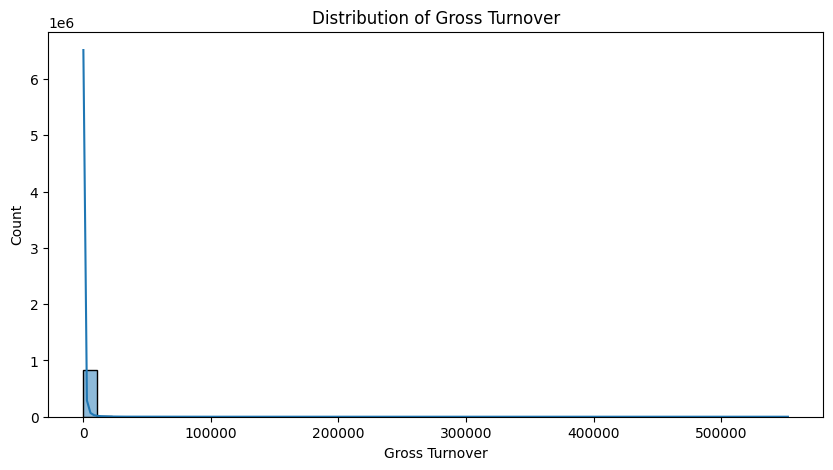

In [109]:
# Distribution of Gross Turnover
plt.figure(figsize=(10,5))
sns.histplot(df_Filtered['GROSS_TURNOVER'], bins=50, kde=True)
plt.title("Distribution of Gross Turnover")
plt.xlabel("Gross Turnover")
plt.show()

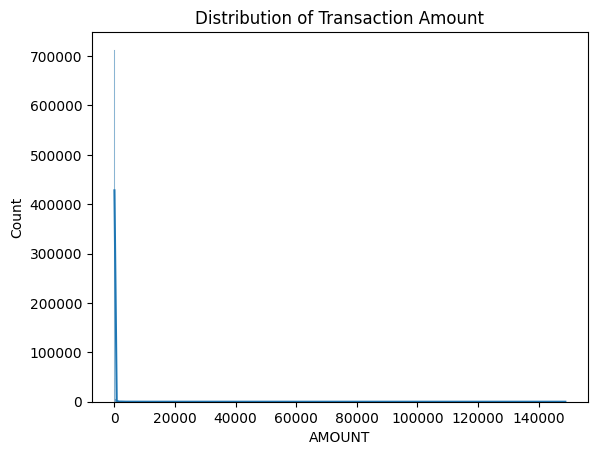

In [110]:
#Distribution of the transaction amount
sns.histplot(df_Filtered['AMOUNT'], kde=True)
plt.title("Distribution of Transaction Amount")
plt.show()

**INTEPRETATION**: We want to see the skewness, outliers, and patterns in sales.

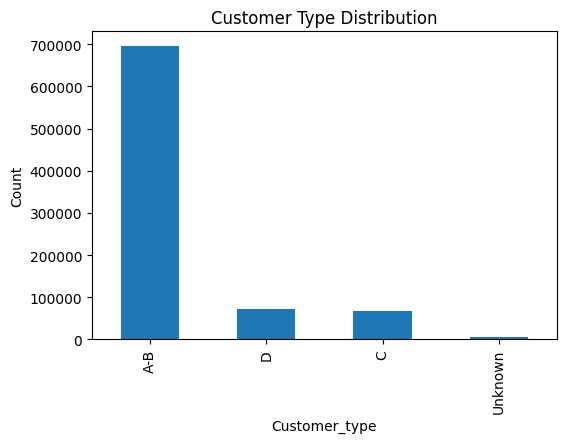

In [111]:
# Customer Type Distribution
plt.figure(figsize=(6,4))
df_Filtered["Customer_type"].value_counts().plot(kind="bar")
plt.title("Customer Type Distribution")
plt.ylabel("Count")
plt.show()


Top 10 Customers by Revenue:



CUSTOMER_NUMBER
140125    1.307989e+07
590220    1.033258e+07
11967     9.003734e+06
710044    8.703852e+06
32367     8.635244e+06
41935     8.583418e+06
101063    7.538087e+06
36903     7.442969e+06
100067    7.392035e+06
75914     6.929235e+06
Name: GROSS_TURNOVER, dtype: float64

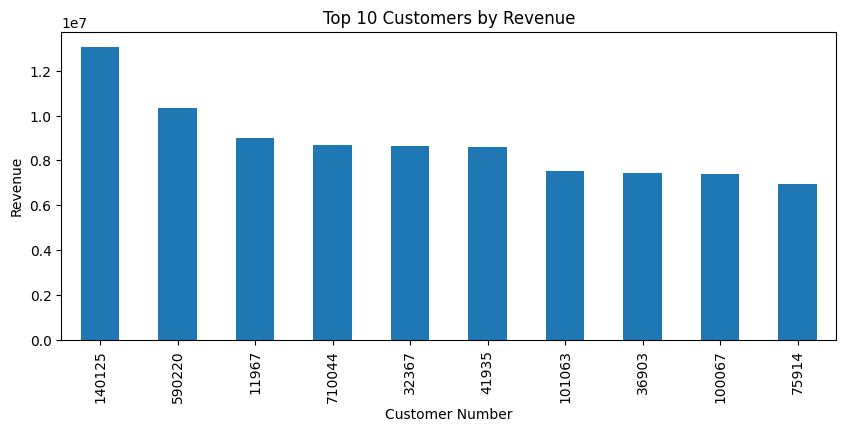

In [112]:
# Top 10 customers by revenue
cust_rev = (
    df_Filtered.groupby("CUSTOMER_NUMBER")["GROSS_TURNOVER"]
    .sum()
    .sort_values(ascending=False)
)

print("\nTop 10 Customers by Revenue:\n")
display(cust_rev.head(10))

plt.figure(figsize=(10,4))
cust_rev.head(10).plot(kind="bar")
plt.title("Top 10 Customers by Revenue")
plt.ylabel("Revenue")
plt.xlabel("Customer Number")
plt.show()


Top 10 Products by Revenue:



PRODUCT
RAKB363       3.355984e+06
RAKB362       2.438983e+06
RAKB364       2.071530e+06
5731103611    1.905000e+06
JXAK          1.790056e+06
4356905595    1.732354e+06
7889405395    1.604188e+06
7889222002    1.469637e+06
5733101996    1.464073e+06
7889226684    1.404596e+06
Name: GROSS_TURNOVER, dtype: float64

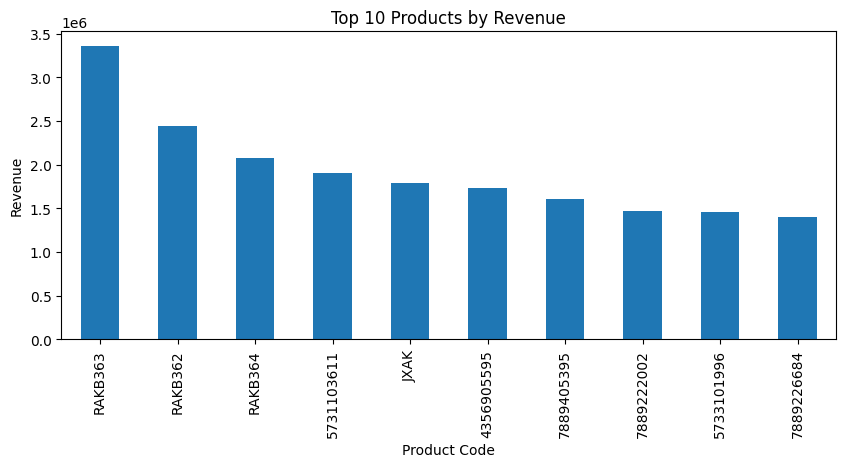

In [113]:
# Top products by revenue
prod_rev = (
    df_Filtered.groupby("PRODUCT")["GROSS_TURNOVER"]
    .sum()
    .sort_values(ascending=False)
)

print("\nTop 10 Products by Revenue:\n")
display(prod_rev.head(10))

plt.figure(figsize=(10,4))
prod_rev.head(10).plot(kind="bar")
plt.title("Top 10 Products by Revenue")
plt.ylabel("Revenue")
plt.xlabel("Product Code")
plt.show()


**INTERETATION**: Here we want to see which customer/ product that give most revenue to the comp

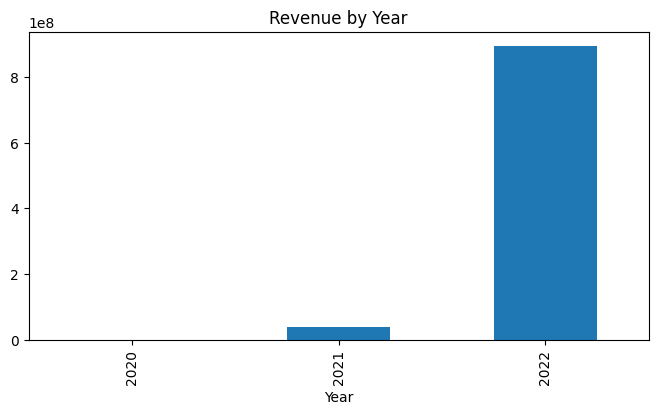

In [114]:
if "DOCUMENT_DATE" in df_Filtered.columns:
    df_Filtered["DOCUMENT_DATE"] = pd.to_datetime(df_Filtered["DOCUMENT_DATE"], errors="coerce")
    df_Filtered["Year"] = df_Filtered["DOCUMENT_DATE"].dt.year
    df_Filtered["Month"] = df_Filtered["DOCUMENT_DATE"].dt.month

    # Revenue by Year
    plt.figure(figsize=(8,4))
    df_Filtered.groupby("Year")["GROSS_TURNOVER"].sum().plot(kind="bar")
    plt.title("Revenue by Year")
    plt.show()


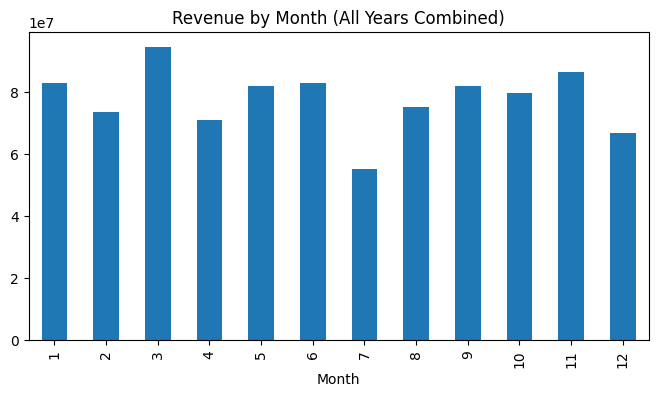

In [115]:
 # Revenue by Month across all years
plt.figure(figsize=(8,4))
df_Filtered.groupby("Month")["GROSS_TURNOVER"].sum().plot(kind="bar")
plt.title("Revenue by Month (All Years Combined)")
plt.show()

To execute the pareto analysis, you must create the required dataset. There are two levels of Product category in this dataset, use ProdCat2 for this analysis.

***Task 2.2: Create a new dataframe df_Pareto with the columns: ProdCat2, Gross_Turnover, Cumulative_GT, Cumulative_GT%***

*Hint: Cumulative_GT is Cumulative Gross Turnover which you can get by doing a cumulative sum on the Gross Turnover.*



In [116]:
df_Filtered['ProdCat2'].isna().sum()

np.int64(0)

In [117]:
#Aggregate gross turnover by ProdCat2
df_Pareto = (
    df_Filtered
    .groupby('ProdCat2', as_index=False)['GROSS_TURNOVER']
    .sum()
    .sort_values(by='GROSS_TURNOVER', ascending=False)
    .reset_index(drop=True)
)

# rename column to exactly as required
df_Pareto = df_Pareto.rename(columns={'GROSS_TURNOVER': 'Gross_Turnover'}).copy()

df_Pareto

,ProdCat2,Gross_Turnover
0,Mobile Plans (Postpaid),5.612589e+07
1,Network Infrastructure Services,4.088779e+07
2,Broadband Internet (Fiber),4.053540e+07
3,Mobile Plans (Prepaid),3.159964e+07
4,Wholesale Telecom Services,2.593824e+07
...,...,...
214,Virtual Reality Services,6.587808e+03
215,Augmented Reality Services,4.814136e+03
216,Mixed Reality Solutions,1.398779e+03
217,5G-Enabled Services,1.286161e+03


**INTEPRET**: Kita group by ProdCat2, sum revenue, then sort descending(large to small). since later we gonna to the Pareto analysis. which to identify these “top contributors

keep in mind thath the GROSS_TURNOVER is the single value for each trasaction. but the Gross_TurnOver is the aggregation sum. 

In [118]:
#Step 2 — Calculate cumulative gross turnover (Cumulative_GT)
df_Pareto['Cumulative_GT'] = df_Pareto['Gross_Turnover'].cumsum()
df_Pareto


,ProdCat2,Gross_Turnover,Cumulative_GT
0,Mobile Plans (Postpaid),5.612589e+07,5.612589e+07
1,Network Infrastructure Services,4.088779e+07,9.701368e+07
2,Broadband Internet (Fiber),4.053540e+07,1.375491e+08
3,Mobile Plans (Prepaid),3.159964e+07,1.691487e+08
4,Wholesale Telecom Services,2.593824e+07,1.950870e+08
...,...,...,...
214,Virtual Reality Services,6.587808e+03,9.313676e+08
215,Augmented Reality Services,4.814136e+03,9.313724e+08
216,Mixed Reality Solutions,1.398779e+03,9.313738e+08
217,5G-Enabled Services,1.286161e+03,9.313751e+08


In [119]:
total_GT = df_Pareto['Gross_Turnover'].sum()

df_Pareto['Cumulative_GT%'] = (
    100 * df_Pareto['Cumulative_GT'] / total_GT
).round(2)

df_Pareto


,ProdCat2,Gross_Turnover,Cumulative_GT,Cumulative_GT%
0,Mobile Plans (Postpaid),5.612589e+07,5.612589e+07,6.03
1,Network Infrastructure Services,4.088779e+07,9.701368e+07,10.42
2,Broadband Internet (Fiber),4.053540e+07,1.375491e+08,14.77
3,Mobile Plans (Prepaid),3.159964e+07,1.691487e+08,18.16
4,Wholesale Telecom Services,2.593824e+07,1.950870e+08,20.95
...,...,...,...,...
214,Virtual Reality Services,6.587808e+03,9.313676e+08,100.00
215,Augmented Reality Services,4.814136e+03,9.313724e+08,100.00
216,Mixed Reality Solutions,1.398779e+03,9.313738e+08,100.00
217,5G-Enabled Services,1.286161e+03,9.313751e+08,100.00


***Task 2.3: Arrive at a "Pareto filtered" dataset df_Pareto_80 with the top product categories that contribute to 80% of the Gross Turnover***

*Hint: There are 64 products that contribute to 80% of Gross Revenue turnover*

From the df_Pareto (already sorted in descending order), we want to keep only the rows where cumulative % ≤ 80%, because these are the “vital few” categories that contribute to the majority of revenue.

In [120]:
#Step 1: Filter categories contributing up to 80%
df_Pareto_80 = df_Pareto[df_Pareto['Cumulative_GT%'] <= 80].copy()
df_Pareto_80


,ProdCat2,Gross_Turnover,Cumulative_GT,Cumulative_GT%
0,Mobile Plans (Postpaid),5.612589e+07,5.612589e+07,6.03
1,Network Infrastructure Services,4.088779e+07,9.701368e+07,10.42
2,Broadband Internet (Fiber),4.053540e+07,1.375491e+08,14.77
3,Mobile Plans (Prepaid),3.159964e+07,1.691487e+08,18.16
4,Wholesale Telecom Services,2.593824e+07,1.950870e+08,20.95
...,...,...,...,...
59,IoT Strategy and Consulting,4.714141e+06,7.251294e+08,77.86
60,IoT Solutions Implementation,4.583767e+06,7.297132e+08,78.35
61,Remote Work Solutions,4.495549e+06,7.342087e+08,78.83
62,Enterprise Mobility Management,4.482553e+06,7.386913e+08,79.31


***Task 2.3: Display the Pareto Chart***

*Hint: Your Pareto Chart will look something like this*

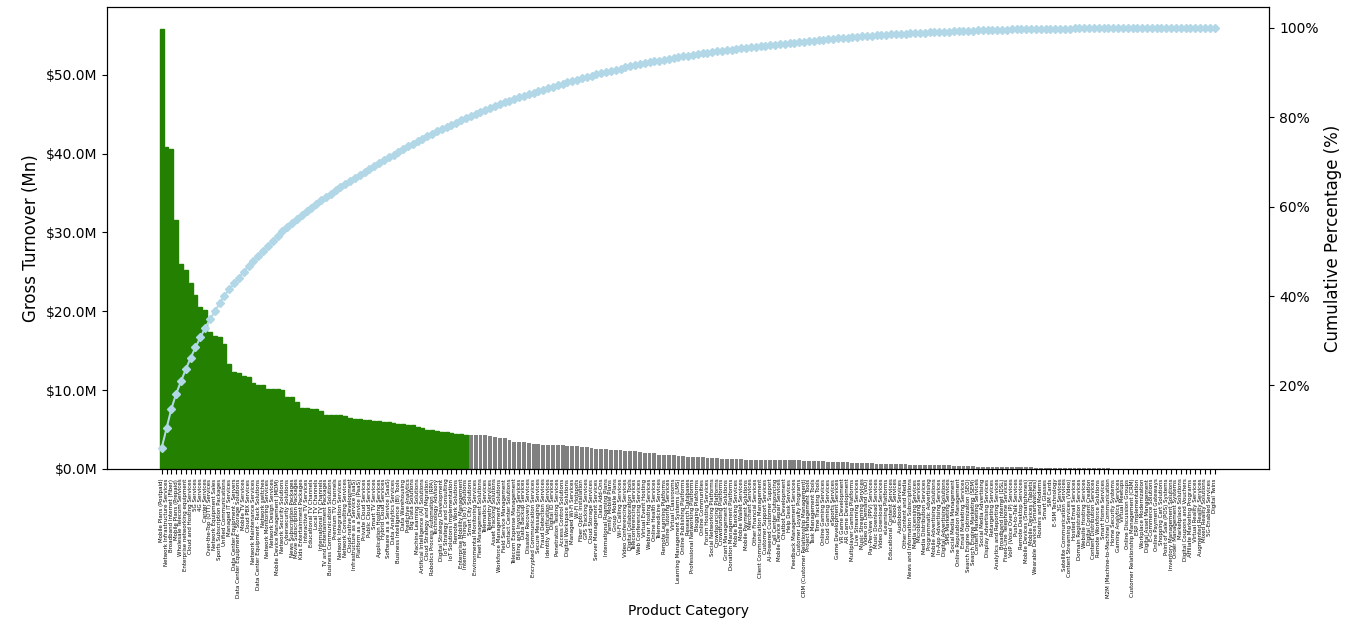


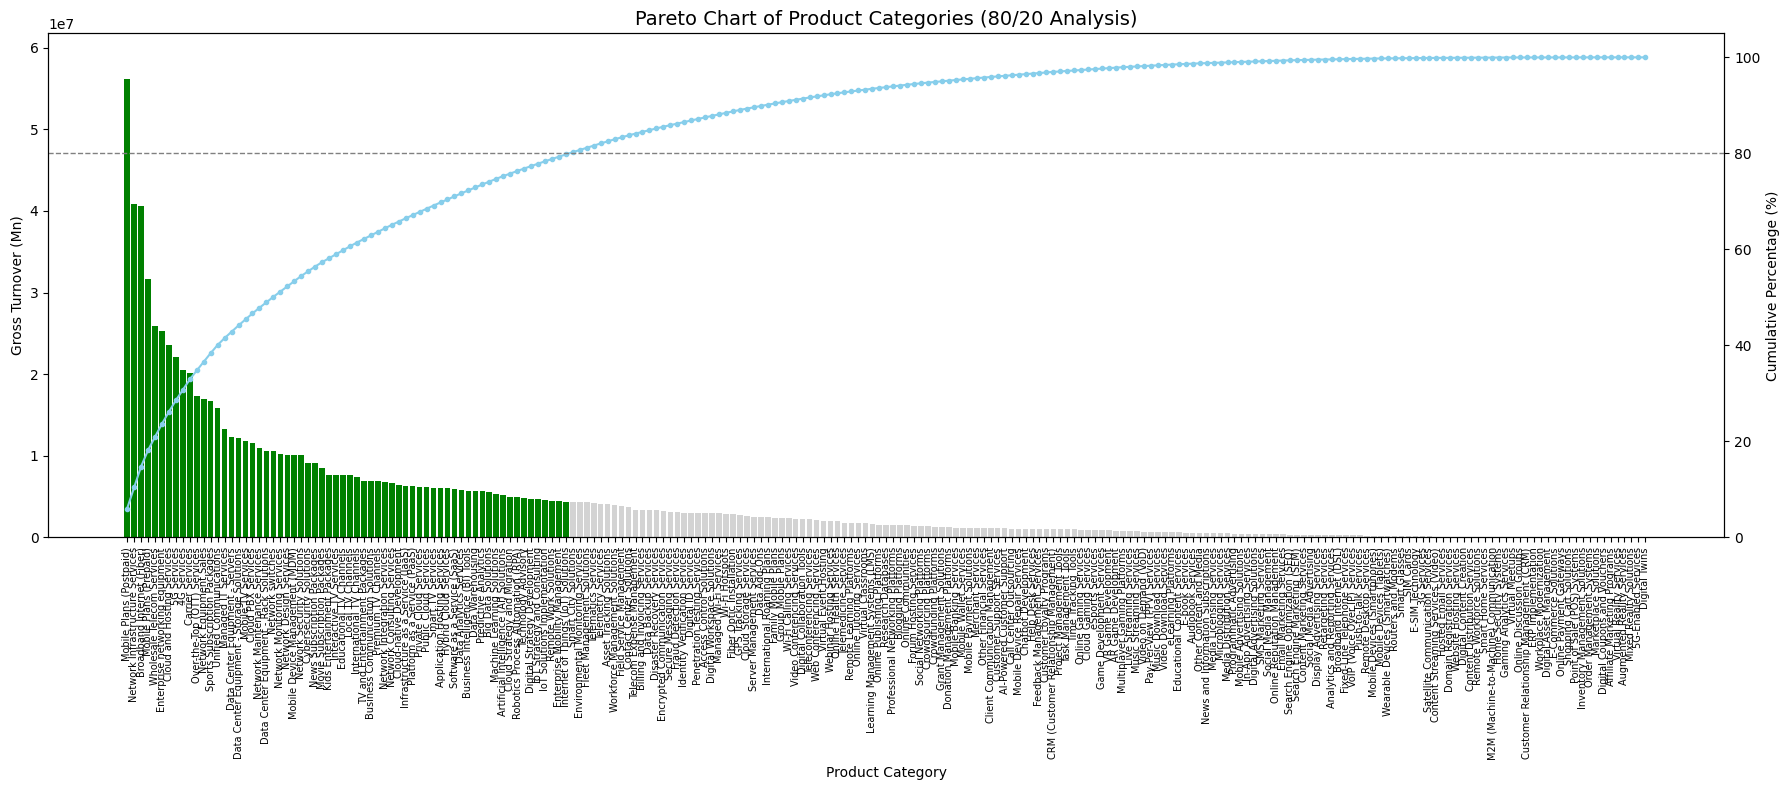

In [121]:
# --- STEP 1: Identify the cutoff for 80% ---
df_Pareto['IsTop80'] = df_Pareto['Cumulative_GT%'] <= 80

# --- STEP 2: Prepare bar colors ---
colors = df_Pareto['IsTop80'].map({True: 'green', False: 'lightgrey'})

# --- STEP 3: Start plotting ---
fig, ax1 = plt.subplots(figsize=(18, 8))

# BAR CHART (left axis)
ax1.bar(
    df_Pareto['ProdCat2'],
    df_Pareto['Gross_Turnover'],
    color=colors
)
ax1.set_xlabel("Product Category")
ax1.set_ylabel("Gross Turnover (Mn)")

# Format y-axis with millions (M)
ax1.set_ylim(0, df_Pareto['Gross_Turnover'].max() * 1.1)

# Rotate labels for readability
plt.xticks(rotation=90, fontsize=7)

# --- STEP 4: Add line chart (cumulative %) ---
ax2 = ax1.twinx()
ax2.plot(
    df_Pareto['ProdCat2'],
    df_Pareto['Cumulative_GT%'],
    color="skyblue",
    marker="o",
    markersize=3,
    linewidth=1.5
)

ax2.set_ylabel("Cumulative Percentage (%)")
ax2.set_ylim(0, 105)

# --- STEP 5: Horizontal 80% reference line ---
ax2.axhline(80, color="grey", linestyle="--", linewidth=1)

# Title
plt.title("Pareto Chart of Product Categories (80/20 Analysis)", fontsize=14)

plt.tight_layout()
plt.show()


**INTEPRETATION**: We must use full df_Pareto, NOT the 80% filtered one.

Why?

Pareto chart must show ALL categories

If you use df_Pareto_80 (only top 80% items), cannot show the "long tail"

The two-color effect (green vs grey) only makes sense with full data

***Task 2.4: Perform the necessary action to map the top products from Pareto Analysis to the previously created master dataframe df_Filtered and store this in a new dataframe df_Filtered_Pareto.***

*Hint: Think Joins?*

In [122]:
#TO GET LIST THE top product categories
df_Pareto_80['ProdCat2'].unique()

array(['Mobile Plans (Postpaid)', 'Network Infrastructure Services',
       'Broadband Internet (Fiber)', 'Mobile Plans (Prepaid)',
       'Wholesale Telecom Services', 'Enterprise networking equipment',
       'Cloud and Hosting Services', '5G Services', '4G Services',
       'Carrier Services', 'Over-the-Top (OTT) Services',
       'Network Equipment Sales', 'Sports Subscription Packages',
       'Unified Communications', 'Managed IT Services',
       'Data Center Equipment - Servers',
       'Data Center Equipment - Storage Solutions', 'Mobile TV Services',
       'Cloud PBX Services', 'Network Maintenance Services',
       'Data Center Equipment - Rack Solutions', 'Network switches',
       'Network Monitoring Services', 'Network Design Services',
       'Mobile Device Management (MDM)', 'Network Security Solutions',
       'Cybersecurity Solutions', 'News Subscription Packages',
       'Movie Subscription Packages', 'Kids Entertainment Packages',
       'Interactive TV Services', 

In [123]:
df_Pareto_80.columns

Index(['ProdCat2', 'Gross_Turnover', 'Cumulative_GT', 'Cumulative_GT%'], dtype='object')

In [124]:
df_Filtered_Pareto = df_Filtered.merge(
    df_Pareto_80,  # Pass the entire Pareto DataFrame
    on='ProdCat2', # The common column to match on
    how='inner'    # This ensures only 'ProdCat2' values found in df_Pareto_80 are kept
).copy()

In [125]:
df_Filtered_Pareto

,INDEX,INVOICE_NUMBER,INVOICE_ITEM,DOCUMENT_DATE,CUSTOMER_NUMBER,Main_account,Main_account_name,Main_resposible_employee_name,PRODUCT,Position_type_order_line,...,ProdCat1,txn_count,Invoice_flag,sku_count,SKU_flag,Year,Month,Gross_Turnover,Cumulative_GT,Cumulative_GT%
0,47154,124195645,10,2022-09-09,15082,103350,Customer Group_24,Responsible Employee_17,5737657492,ZLAG,...,Digital Transformation Services,1575,1,2009,1,2022,9,4.985527e+06,7.059144e+08,75.79
1,47184,124167744,70,2022-09-07,15082,103350,Customer Group_24,Responsible Employee_17,4441429746,ZLAG,...,Data and Analytics,1575,1,2009,1,2022,9,5.630210e+06,6.847518e+08,73.52
2,48255,124385024,480,2022-10-10,15082,103350,Customer Group_24,Responsible Employee_17,31592006,ZLAG,...,Television and Entertainment,1575,1,2009,1,2022,10,1.176919e+07,4.230700e+08,45.42
3,48315,123063686,10,2022-03-02,15082,103350,Customer Group_24,Responsible Employee_17,JSF 505,ZLAG,...,Broadband and Internet Services,1575,1,2009,1,2022,3,2.051854e+07,2.864998e+08,30.76
4,48316,123063686,30,2022-03-02,15082,103350,Customer Group_24,Responsible Employee_17,JSF 406,ZLAG,...,Broadband and Internet Services,1575,1,2009,1,2022,3,2.051854e+07,2.864998e+08,30.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644953,1320582,123875314,420,2022-07-14,950003,950003,Customer Group_356,Responsible Employee_23,7517900492,ZLAG,...,Network and Infrastructure,175,1,607,1,2022,7,1.093534e+07,4.456150e+08,47.84
644954,1320758,123296377,620,2022-04-08,950003,950003,Customer Group_356,Responsible Employee_23,4486804411,ZLAG,...,Network and Infrastructure,175,1,607,1,2022,4,2.593824e+07,1.950870e+08,20.95
644955,1333474,123662330,480,2022-06-02,980001,980001,Customer Group_1106,Responsible Employee_7,4810002773,ZLAG,...,Devices and Accessories,763,1,954,1,2022,6,1.233448e+07,3.991330e+08,42.85
644956,1348783,123561680,240,2022-05-02,994332,994332,Customer Group_4555,Responsible Employee_48,7857002746,ZKSK,...,Security and Privacy,487,1,701,1,2022,5,9.178528e+06,5.164184e+08,55.45


In [126]:
df_Filtered_Pareto.isna().sum()

INDEX                               0
INVOICE_NUMBER                      0
INVOICE_ITEM                        0
DOCUMENT_DATE                       0
CUSTOMER_NUMBER                     0
Main_account                        0
Main_account_name                   0
Main_resposible_employee_name       0
PRODUCT                             0
Position_type_order_line            0
GROSS_TURNOVER                      0
AMOUNT                              0
CUSTOMER_NAME                       0
ACCOUNT_GROUP_TXT                   0
CVR_Company_status               8149
Main_account_ID                     0
Customer_type                       0
ProductID                           0
ProductCategoryID                   0
ProdCat2                            0
ProdCat1                            0
txn_count                           0
Invoice_flag                        0
sku_count                           0
SKU_flag                            0
Year                                0
Month       

**INTEPRETATION**: we used the join instead of isin due to isin does not fully map the top productsto the newdataframe, which we might lose column such as Cumulatice_GT%. 

In the above dataset, you will notice that there are some columns that are repititive and redundant.

***Task 2.5: Remove the redundant columns and give a meaningful name to the repititive columns***

In [127]:
df_Filtered_Pareto.columns

Index(['INDEX', 'INVOICE_NUMBER', 'INVOICE_ITEM', 'DOCUMENT_DATE',
       'CUSTOMER_NUMBER', 'Main_account', 'Main_account_name',
       'Main_resposible_employee_name', 'PRODUCT', 'Position_type_order_line',
       'GROSS_TURNOVER', 'AMOUNT', 'CUSTOMER_NAME', 'ACCOUNT_GROUP_TXT',
       'CVR_Company_status', 'Main_account_ID', 'Customer_type', 'ProductID',
       'ProductCategoryID', 'ProdCat2', 'ProdCat1', 'txn_count',
       'Invoice_flag', 'sku_count', 'SKU_flag', 'Year', 'Month',
       'Gross_Turnover', 'Cumulative_GT', 'Cumulative_GT%'],
      dtype='object')

In [128]:
df_Filtered_Pareto[["Main_account_ID","Main_account"]]

,Main_account_ID,Main_account
0,103350,103350
1,103350,103350
2,103350,103350
3,103350,103350
4,103350,103350
...,...,...
644953,950003,950003
644954,950003,950003
644955,980001,980001
644956,994332,994332


In [129]:
df_Filtered_Pareto[["PRODUCT","ProductID"]]

,PRODUCT,ProductID
0,5737657492,5737657492
1,4441429746,4441429746
2,31592006,31592006
3,JSF 505,JSF 505
4,JSF 406,JSF 406
...,...,...
644953,7517900492,7517900492
644954,4486804411,4486804411
644955,4810002773,4810002773
644956,7857002746,7857002746


In [130]:
## Remove the redundant columns
df_Filtered_Pareto.drop(columns=['Main_account_ID', 'ProductID', 'INDEX'], inplace=True, errors='ignore')


remove
1. index- This appears to be a row identifier from the transaction datasets 
2. Main_account_ID- This column came from the Customer Type Mapping file. that merged data with Main_account with the mapping with Main_account_ID
3. ProductID - This column came from the Product Category Mapping file. that  merged  with  PRODUCT with the mapping ProductID.  It is a duplicate of the PRODUCT column.

In [131]:
df_Filtered_Pareto = df_Filtered_Pareto.rename(columns={"Gross_Turnover": "Category_Gross_Turnover"})

In [132]:
df_Filtered_Pareto.columns

Index(['INVOICE_NUMBER', 'INVOICE_ITEM', 'DOCUMENT_DATE', 'CUSTOMER_NUMBER',
       'Main_account', 'Main_account_name', 'Main_resposible_employee_name',
       'PRODUCT', 'Position_type_order_line', 'GROSS_TURNOVER', 'AMOUNT',
       'CUSTOMER_NAME', 'ACCOUNT_GROUP_TXT', 'CVR_Company_status',
       'Customer_type', 'ProductCategoryID', 'ProdCat2', 'ProdCat1',
       'txn_count', 'Invoice_flag', 'sku_count', 'SKU_flag', 'Year', 'Month',
       'Category_Gross_Turnover', 'Cumulative_GT', 'Cumulative_GT%'],
      dtype='object')

In [133]:
df_Filtered_Pareto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644958 entries, 0 to 644957
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   INVOICE_NUMBER                 644958 non-null  object        
 1   INVOICE_ITEM                   644958 non-null  int64         
 2   DOCUMENT_DATE                  644958 non-null  datetime64[ns]
 3   CUSTOMER_NUMBER                644958 non-null  object        
 4   Main_account                   644958 non-null  object        
 5   Main_account_name              644958 non-null  object        
 6   Main_resposible_employee_name  644958 non-null  object        
 7   PRODUCT                        644958 non-null  object        
 8   Position_type_order_line       644958 non-null  object        
 9   GROSS_TURNOVER                 644958 non-null  float64       
 10  AMOUNT                         644958 non-null  int64         
 11  

**This analysis gives an understanding of the top product portfolio of the company. This will be further used to perform customer segmentation.**

### 3. Customer Segmentation

The next part in this analysis is to find meaningful customer segments from the product purchase behaviour. 

You will use **KMeans Clustering Algorithm** for this.

### KMeans Algorithm 
The KMeans algorithm is a popular clustering technique used to partition a dataset into K clusters, where each data point belongs to the cluster with the nearest mean. Here are the steps involved in the KMeans algorithm:

**Initialization:**

- Choose the optimal number of clusters K, say 3 in this case. 
- Randomly select K data points from the dataset as the initial centroids (cluster centers).

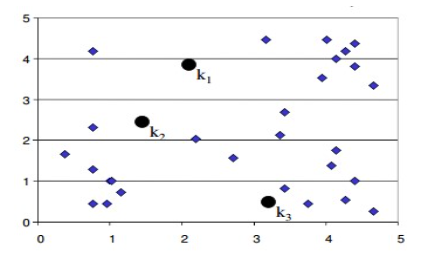

**Assignment Step:**

- Assign each data point to the nearest centroid. This is usually done by calculating the Euclidean distance between each data point and the centroids.
- Each data point is assigned to the cluster whose centroid is closest to it.

**Update Step:**

- Recalculate the centroids as the mean of all data points assigned to each cluster.
- The new centroid for each cluster is the average of the positions of all the data points in that cluster.

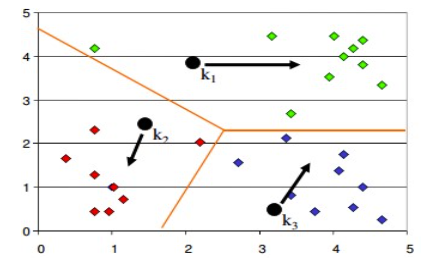

**Repeat:**

- Repeat the Assignment and Update steps until the centroids no longer change significantly or a specified number of iterations is reached.
- This convergence indicates that the clusters are stable, and the algorithm has found the optimal clustering.

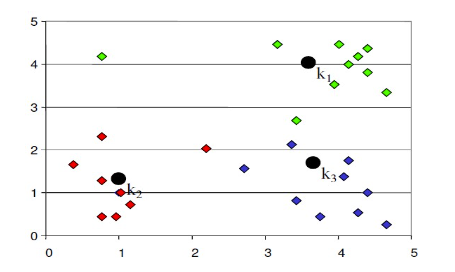

**Termination:**

- The algorithm terminates when the centroids have stabilized (i.e., they do not change significantly between iterations) or after a pre-defined number of iterations.



To execute this analysis, **Main Account** and **ProdCat1** (is a broader product category and is at the highest level in the product hierarchy) data will be used.

*Note: ProdCat2 level data is at a very granular level and performing clustering analysis on this might not give meaningful clusters.*

To proceed with the customer segmentation analysis, you need to menaingfully prepare the data.

***Task 3.1: Transform the data to feed to the clustering algorithm***

- Create a copy of the above dataframe and save it as **df_segment**
- Create a Primary Key: Concatenate the Main Account (ID) and Main Account Name
- Execute a groupby operation to calculate the annual turnover of each customer for each product (ProdCat1)
- Calculate the % spend by each customer across different product categories

The resultant dataframe will have the following columns:
- Primary Key
- ProdCat1
- Gross_Turnover
- Customer Spend %

In [134]:
# Create a copy of the filtered dataframe
df_segment = df_Filtered_Pareto.copy()

In [135]:
#Create Primary Key

df_segment['Primary_Key'] = df_segment['Main_account'].astype(str) + '_' + df_segment['Main_account_name']

**INTEPRETATION**: We want to make a unique ID. So we "concat" (gabung) the Account Number and the Account Name together. This one becomes our unique identifier, so we know exactly siapa (who) is this customer.

In [136]:
#Groupby and Calculate Turnover
df_segment = df_segment.groupby(['Primary_Key', 'ProdCat1'])['GROSS_TURNOVER'].sum().reset_index()
df_segment.rename(columns={'GROSS_TURNOVER': 'Gross_Turnover'}, inplace=True)
df_segment

,Primary_Key,ProdCat1,Gross_Turnover
0,100015_Customer Group_2149,Broadband and Internet Services,9250.0397
1,100015_Customer Group_2149,Cloud and Hosting Services,124.6860
2,100015_Customer Group_2149,Devices and Accessories,132.1738
3,100015_Customer Group_2149,Digital Transformation Services,4106.3290
4,100015_Customer Group_2149,Mobile Services,123.7080
...,...,...,...
22687,999906_Customer Group_4744,Television and Entertainment,161.3058
22688,999950_Customer Group_4745,Business Solutions,8925.8400
22689,999950_Customer Group_4745,Network and Infrastructure,3899.0720
22690,999950_Customer Group_4745,Security and Privacy,65.6100


**INTEPRETATION**: We want to know for each customer (Primary_Key), how much they spent on each category (ProdCat1).We group by the Customer and the Product Category. Then we sum up the GROSS_TURNOVER.

In [137]:
#Calculate Customer Spend %
# 1. Calculate the total spend for each customer across ALL categories
customer_total_spend = df_segment.groupby('Primary_Key')['Gross_Turnover'].transform('sum')

# 2. Calculate the percentage
df_segment['Customer Spend %'] = (df_segment['Gross_Turnover'] / customer_total_spend) * 100

# Round it to 2 dp
df_segment['Customer Spend %'] = df_segment['Customer Spend %'].round(2)

In [138]:
df_segment

,Primary_Key,ProdCat1,Gross_Turnover,Customer Spend %
0,100015_Customer Group_2149,Broadband and Internet Services,9250.0397,44.25
1,100015_Customer Group_2149,Cloud and Hosting Services,124.6860,0.60
2,100015_Customer Group_2149,Devices and Accessories,132.1738,0.63
3,100015_Customer Group_2149,Digital Transformation Services,4106.3290,19.65
4,100015_Customer Group_2149,Mobile Services,123.7080,0.59
...,...,...,...,...
22687,999906_Customer Group_4744,Television and Entertainment,161.3058,100.00
22688,999950_Customer Group_4745,Business Solutions,8925.8400,36.94
22689,999950_Customer Group_4745,Network and Infrastructure,3899.0720,16.13
22690,999950_Customer Group_4745,Security and Privacy,65.6100,0.27


***Task 3.2: Pivot the dataset to create a matrix view of spend % of all customers on all products (ProdCat1). Save the dataframe as df_pivot. Create another dataframe df_clustering removing the primary key from the df_pivot dataframe.***

In [139]:
# Create the matrix view
df_pivot = df_segment.pivot(index='Primary_Key', columns='ProdCat1', values='Customer Spend %')
# Fill NaN values with 0 (Because if they didn't buy, their spend is 0%)
df_pivot = df_pivot.fillna(0)
df_pivot

ProdCat1,Broadband and Internet Services,Business Solutions,Cloud and Hosting Services,Data and Analytics,Devices and Accessories,Digital Transformation Services,IoT and Smart Solutions,Mobile Services,Network and Infrastructure,Security and Privacy,Television and Entertainment
Primary_Key,,,,,,,,,,,
100015_Customer Group_2149,44.25,0.00,0.60,0.00,0.63,19.65,0.0,0.59,23.84,0.00,10.44
100022_Customer Group_1631,0.00,18.88,6.79,0.00,12.55,0.00,0.0,5.43,10.35,44.61,1.39
100027_Customer Group_2392,34.30,0.00,1.03,1.42,0.00,0.00,0.0,35.76,4.64,0.00,22.84
100040_Customer Group_2150,0.00,5.05,4.29,0.00,0.00,0.00,0.0,0.66,89.41,0.00,0.59
100041_Customer Group_477,23.34,5.27,1.18,0.85,6.21,3.94,0.0,12.24,29.98,0.24,16.77
...,...,...,...,...,...,...,...,...,...,...,...
996943_Customer Group_4952,0.00,0.00,0.00,0.00,0.00,0.00,0.0,100.00,0.00,0.00,0.00
996972_Customer Group_5010,0.00,0.00,0.88,42.61,0.61,1.28,0.0,20.55,27.46,5.30,1.31
999560_Customer Group_5093,7.40,0.00,7.64,17.97,3.05,25.35,0.0,3.75,21.43,2.85,10.56


In [140]:
df_clustering = df_pivot.reset_index(drop=True)
df_clustering

ProdCat1,Broadband and Internet Services,Business Solutions,Cloud and Hosting Services,Data and Analytics,Devices and Accessories,Digital Transformation Services,IoT and Smart Solutions,Mobile Services,Network and Infrastructure,Security and Privacy,Television and Entertainment
0,44.25,0.00,0.60,0.00,0.63,19.65,0.0,0.59,23.84,0.00,10.44
1,0.00,18.88,6.79,0.00,12.55,0.00,0.0,5.43,10.35,44.61,1.39
2,34.30,0.00,1.03,1.42,0.00,0.00,0.0,35.76,4.64,0.00,22.84
3,0.00,5.05,4.29,0.00,0.00,0.00,0.0,0.66,89.41,0.00,0.59
4,23.34,5.27,1.18,0.85,6.21,3.94,0.0,12.24,29.98,0.24,16.77
...,...,...,...,...,...,...,...,...,...,...,...
3924,0.00,0.00,0.00,0.00,0.00,0.00,0.0,100.00,0.00,0.00,0.00
3925,0.00,0.00,0.88,42.61,0.61,1.28,0.0,20.55,27.46,5.30,1.31
3926,7.40,0.00,7.64,17.97,3.05,25.35,0.0,3.75,21.43,2.85,10.56
3927,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,100.00


In [141]:
df_clustering.describe()

ProdCat1,Broadband and Internet Services,Business Solutions,Cloud and Hosting Services,Data and Analytics,Devices and Accessories,Digital Transformation Services,IoT and Smart Solutions,Mobile Services,Network and Infrastructure,Security and Privacy,Television and Entertainment
count,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000
mean,5.928323,4.199684,10.048916,4.783729,6.842006,8.452535,0.637951,13.033148,22.772413,6.421331,16.879735
std,15.694458,11.665743,17.980674,12.164124,14.444581,15.607436,6.655415,19.981923,25.464242,16.825334,22.020007
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.130000,0.000000,0.890000
50%,0.000000,0.000000,2.670000,0.060000,0.190000,1.990000,0.000000,5.050000,14.660000,0.080000,9.160000
75%,2.490000,2.220000,11.330000,3.860000,7.010000,9.680000,0.000000,16.830000,35.260000,3.460000,22.520000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


### The Elbow Method in KMeans Clustering

The Elbow Method is a commonly used technique to determine the optimal number of clusters (K) in KMeans clustering. It helps to balance between underfitting and overfitting by finding a point where adding more clusters doesn’t significantly improve the model performance. 

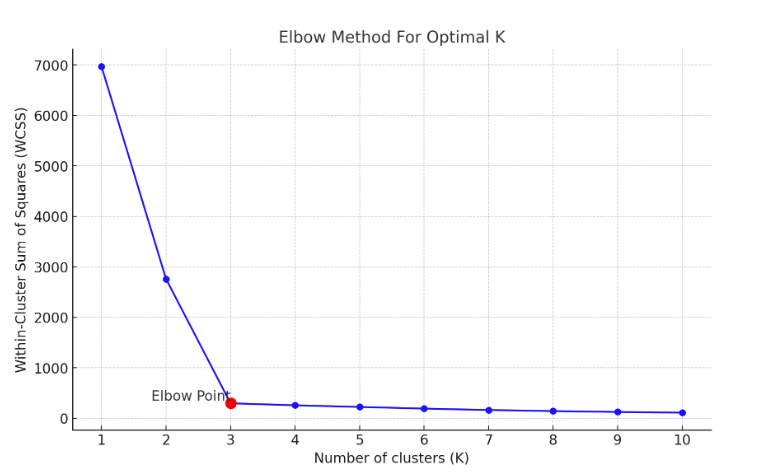

***Explanation of the Plot***

**WCSS (Within Cluster Sum of Squares) vs. Number of Clusters:**

- The x-axis represents the number of clusters (K).
- The y-axis represents the Within-Cluster Sum of Squares (WCSS), which measures the variance within each cluster.

**Plotting WCSS for Different K Values:**

- For each value of K (from 1 to 10), the KMeans algorithm is run, and the corresponding WCSS is calculated.
- The plot shows how WCSS decreases as the number of clusters increases.

**Elbow Point:**

- The red point marked on the plot indicates the "elbow point" where the rate of decrease in WCSS slows down.
- In this example, the elbow point is at K = 3. This suggests that 3 clusters are optimal for this dataset, as adding more clusters beyond this point results in only a marginal reduction in WCSS.

**Interpretation:**

- Before the Elbow Point: Adding more clusters significantly reduces WCSS, indicating that the clusters are becoming more defined and compact.
- After the Elbow Point: The reduction in WCSS slows down, meaning that adding more clusters doesn’t significantly improve the clustering.

**Conclusion** 

The Elbow Method helps to identify the optimal number of clusters by looking for the point where the WCSS starts to decrease at a slower rate, balancing model complexity and performance. In this case, the plot suggests that using 3 clusters is a good choice for the dataset.

***Task 3.3: Run K-Means clustering algorithm and identify the optimal number of clusters using Elbow Method***

In [142]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_clustering_scaled = scaler.fit_transform(df_clustering)
df_clustering_scaled = pd.DataFrame(df_clustering_scaled,
                                    columns=df_clustering.columns)


In [143]:
df_clustering_scaled.describe()


ProdCat1,Broadband and Internet Services,Business Solutions,Cloud and Hosting Services,Data and Analytics,Devices and Accessories,Digital Transformation Services,IoT and Smart Solutions,Mobile Services,Network and Infrastructure,Security and Privacy,Television and Entertainment
count,3.929000e+03,3.929000e+03,3.929000e+03,3.929000e+03,3.929000e+03,3.929000e+03,3.929000e+03,3.929000e+03,3.929000e+03,3.929000e+03,3.929000e+03
mean,-2.531840e-17,3.255223e-17,-2.712685e-17,-1.808457e-17,2.531840e-17,-3.074377e-17,-2.170148e-17,3.616914e-17,-2.350994e-17,2.712685e-18,3.436068e-17
std,1.000127e+00,1.000127e+00,1.000127e+00,1.000127e+00,1.000127e+00,1.000127e+00,1.000127e+00,1.000127e+00,1.000127e+00,1.000127e+00,1.000127e+00
min,-3.777816e-01,-3.600473e-01,-5.589443e-01,-3.933154e-01,-4.737331e-01,-5.416400e-01,-9.586665e-02,-6.523300e-01,-8.944037e-01,-3.816952e-01,-7.666612e-01
25%,-3.777816e-01,-3.600473e-01,-5.589443e-01,-3.933154e-01,-4.737331e-01,-5.416400e-01,-9.586665e-02,-6.523300e-01,-8.892978e-01,-3.816952e-01,-7.262382e-01
50%,-3.777816e-01,-3.600473e-01,-4.104326e-01,-3.883822e-01,-4.605777e-01,-4.141204e-01,-9.586665e-02,-3.995694e-01,-3.186211e-01,-3.769398e-01,-3.506229e-01
75%,-2.191067e-01,-1.697223e-01,7.125691e-02,-7.594844e-02,1.163175e-02,7.865618e-02,-9.586665e-02,1.900385e-01,4.904594e-01,-1.760267e-01,2.561753e-01
max,5.994705e+00,8.213151e+00,5.003290e+00,7.828627e+00,6.450159e+00,5.866378e+00,1.493141e+01,4.352830e+00,3.033172e+00,5.562480e+00,3.775242e+00


**INTEPRETATION**: We must must scale the dataset before running KMeans.Because your columns have very different ranges and they DO NOT have equal variance. 

the KMeans will give heavier weight to features with bigger spread( high variance).

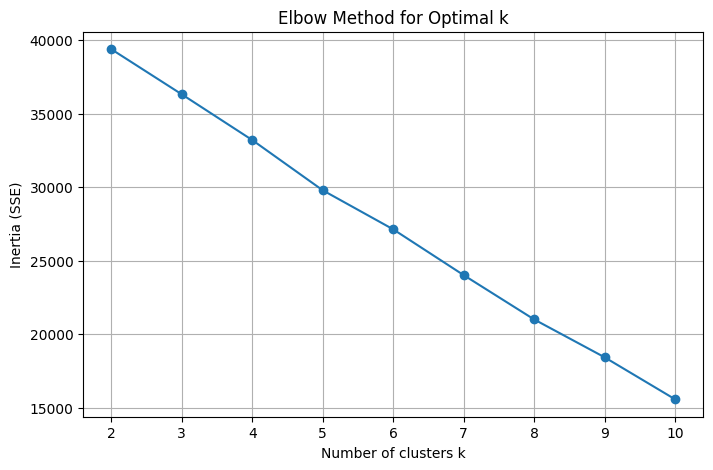

In [144]:
##elbow curve
# df_clustering_scaled is your scaled dataset from previous step
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Try k from 2 to 10 (or higher if you want)
K = range(2, 11)
inertias = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    kmeans.fit(df_clustering_scaled)
    inertias.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(K, inertias, marker='o')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method for Optimal k')
plt.xticks(K)
plt.grid(True)
plt.show()


**INTEPRETATION**: From here we could see the elbow hardly but i can said it 4-6 where the slope become slightly flatter, so we used the Silhoutte score method to validate the optimal number of clusters. 

Silhouette score tells you:

How well each customer fits into its own cluster
vs

How different it is from other clusters
+1.0 → sangat bagus (well-separated clusters)

0.5 → cantik

0.2–0.4 → boleh lah (normal for real data)

< 0 → teruk (clusters overlap, wrong k)

k=2, silhouette_score=0.1264
k=3, silhouette_score=0.0861
k=4, silhouette_score=0.1713
k=5, silhouette_score=0.1540
k=6, silhouette_score=0.1888
k=7, silhouette_score=0.2182
k=8, silhouette_score=0.2278
k=9, silhouette_score=0.2772
k=10, silhouette_score=0.3000


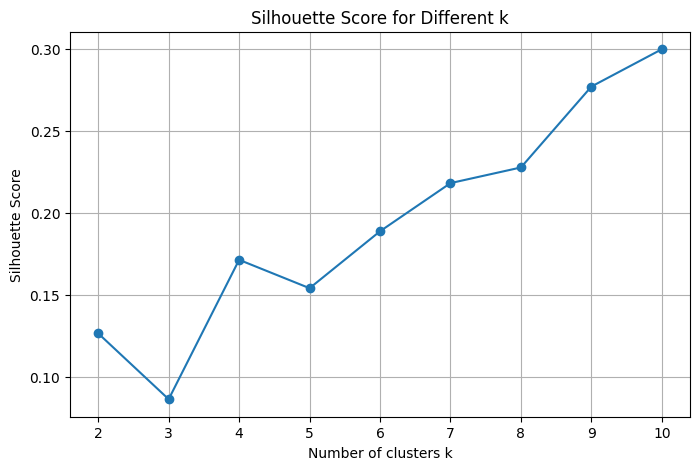

In [145]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

K = range(2, 11)
silhouette_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = kmeans.fit_predict(df_clustering_scaled)
    sil = silhouette_score(df_clustering_scaled, labels)
    silhouette_scores.append(sil)
    print(f"k={k}, silhouette_score={sil:.4f}")

# Plot silhouette scores
plt.figure(figsize=(8,5))
plt.plot(K, silhouette_scores, marker='o')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k')
plt.xticks(K)
plt.grid(True)
plt.show()


**INTEPRETATION**: The silhouette score keeps increasing as k increases, but it may due to: Data has many dimensions

Many clusters can isolate small variations

But this doesn’t mean k=10 is the best for business use

this due to Too many clusters → susah interpret, susah nak buat marketing strategy.

since the silhouette score shows improvement starting at k=4
AND large jumps happen near 6 and the elbow plot also this rance, the best balance is k=6

**INTEPRETATION**: Although the Elbow plot did not show a pronounced kink, a mild flattening was observed around k=4–6. I compared this with the silhouette scores, which showed a clear improvement at k=6. Therefore, k=6 represents the best balance between cluster compactness, separation, and business interpretability.

The Elbow Curve provides an optimal value for 'k' that is the number of clusters to be generated in the output. This value can be used as a guideline for the actual clustering run; one may vary the number of clusers in the output based on business need.

***Task 3.4: Run the KMeans algorithm with optimal number of clusters***

In [146]:
from sklearn.cluster import KMeans

# Set k
k = 6

# Run KMeans
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(df_clustering_scaled)

# Add cluster labels to your original dataframe 
df_clustering['Cluster'] = clusters
df_clustering_scaled['Cluster'] = clusters

# View counts for each cluster
df_clustering


ProdCat1,Broadband and Internet Services,Business Solutions,Cloud and Hosting Services,Data and Analytics,Devices and Accessories,Digital Transformation Services,IoT and Smart Solutions,Mobile Services,Network and Infrastructure,Security and Privacy,Television and Entertainment,Cluster
0,44.25,0.00,0.60,0.00,0.63,19.65,0.0,0.59,23.84,0.00,10.44,3
1,0.00,18.88,6.79,0.00,12.55,0.00,0.0,5.43,10.35,44.61,1.39,1
2,34.30,0.00,1.03,1.42,0.00,0.00,0.0,35.76,4.64,0.00,22.84,3
3,0.00,5.05,4.29,0.00,0.00,0.00,0.0,0.66,89.41,0.00,0.59,4
4,23.34,5.27,1.18,0.85,6.21,3.94,0.0,12.24,29.98,0.24,16.77,4
...,...,...,...,...,...,...,...,...,...,...,...,...
3924,0.00,0.00,0.00,0.00,0.00,0.00,0.0,100.00,0.00,0.00,0.00,2
3925,0.00,0.00,0.88,42.61,0.61,1.28,0.0,20.55,27.46,5.30,1.31,5
3926,7.40,0.00,7.64,17.97,3.05,25.35,0.0,3.75,21.43,2.85,10.56,0
3927,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,100.00,0


In [147]:
# View counts for each cluster
df_clustering['Cluster'].value_counts()


Cluster
4    1056
2    1010
0     887
1     561
3     267
5     148
Name: count, dtype: int64

***Task 3.5: From the above clusters, create cluster profile***

***Task 3.5.1: Map each customers to their respective cluster in df_segment dataset***

**INTEPRETATION**: to recall we have : 
df_clustering = 
- One row per customer
- Columns = product categories (pivoted)
- NO primary key


df_pivot = 
- One row per customer
- Has Primary Key
- Has same product spend % as df_clustering


df_segment = 
- MANY rows per customer (because grouped by product category)


In [148]:
df_pivot

ProdCat1,Broadband and Internet Services,Business Solutions,Cloud and Hosting Services,Data and Analytics,Devices and Accessories,Digital Transformation Services,IoT and Smart Solutions,Mobile Services,Network and Infrastructure,Security and Privacy,Television and Entertainment
Primary_Key,,,,,,,,,,,
100015_Customer Group_2149,44.25,0.00,0.60,0.00,0.63,19.65,0.0,0.59,23.84,0.00,10.44
100022_Customer Group_1631,0.00,18.88,6.79,0.00,12.55,0.00,0.0,5.43,10.35,44.61,1.39
100027_Customer Group_2392,34.30,0.00,1.03,1.42,0.00,0.00,0.0,35.76,4.64,0.00,22.84
100040_Customer Group_2150,0.00,5.05,4.29,0.00,0.00,0.00,0.0,0.66,89.41,0.00,0.59
100041_Customer Group_477,23.34,5.27,1.18,0.85,6.21,3.94,0.0,12.24,29.98,0.24,16.77
...,...,...,...,...,...,...,...,...,...,...,...
996943_Customer Group_4952,0.00,0.00,0.00,0.00,0.00,0.00,0.0,100.00,0.00,0.00,0.00
996972_Customer Group_5010,0.00,0.00,0.88,42.61,0.61,1.28,0.0,20.55,27.46,5.30,1.31
999560_Customer Group_5093,7.40,0.00,7.64,17.97,3.05,25.35,0.0,3.75,21.43,2.85,10.56


In [149]:
df_clustering

ProdCat1,Broadband and Internet Services,Business Solutions,Cloud and Hosting Services,Data and Analytics,Devices and Accessories,Digital Transformation Services,IoT and Smart Solutions,Mobile Services,Network and Infrastructure,Security and Privacy,Television and Entertainment,Cluster
0,44.25,0.00,0.60,0.00,0.63,19.65,0.0,0.59,23.84,0.00,10.44,3
1,0.00,18.88,6.79,0.00,12.55,0.00,0.0,5.43,10.35,44.61,1.39,1
2,34.30,0.00,1.03,1.42,0.00,0.00,0.0,35.76,4.64,0.00,22.84,3
3,0.00,5.05,4.29,0.00,0.00,0.00,0.0,0.66,89.41,0.00,0.59,4
4,23.34,5.27,1.18,0.85,6.21,3.94,0.0,12.24,29.98,0.24,16.77,4
...,...,...,...,...,...,...,...,...,...,...,...,...
3924,0.00,0.00,0.00,0.00,0.00,0.00,0.0,100.00,0.00,0.00,0.00,2
3925,0.00,0.00,0.88,42.61,0.61,1.28,0.0,20.55,27.46,5.30,1.31,5
3926,7.40,0.00,7.64,17.97,3.05,25.35,0.0,3.75,21.43,2.85,10.56,0
3927,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,100.00,0


In [150]:
df_pivot.columns


Index(['Broadband and Internet Services', 'Business Solutions',
       'Cloud and Hosting Services', 'Data and Analytics',
       'Devices and Accessories', 'Digital Transformation Services',
       'IoT and Smart Solutions', 'Mobile Services',
       'Network and Infrastructure', 'Security and Privacy',
       'Television and Entertainment'],
      dtype='object', name='ProdCat1')

In [151]:
#Reset index so Primary_Key becomes column
df_pivot = df_pivot.reset_index()
df_pivot.columns

Index(['Primary_Key', 'Broadband and Internet Services', 'Business Solutions',
       'Cloud and Hosting Services', 'Data and Analytics',
       'Devices and Accessories', 'Digital Transformation Services',
       'IoT and Smart Solutions', 'Mobile Services',
       'Network and Infrastructure', 'Security and Privacy',
       'Television and Entertainment'],
      dtype='object', name='ProdCat1')

In [152]:
#Add Primary Key to df_clustering
df_clustering['Primary_Key'] = df_pivot['Primary_Key'].values
df_clustering

ProdCat1,Broadband and Internet Services,Business Solutions,Cloud and Hosting Services,Data and Analytics,Devices and Accessories,Digital Transformation Services,IoT and Smart Solutions,Mobile Services,Network and Infrastructure,Security and Privacy,Television and Entertainment,Cluster,Primary_Key
0,44.25,0.00,0.60,0.00,0.63,19.65,0.0,0.59,23.84,0.00,10.44,3,100015_Customer Group_2149
1,0.00,18.88,6.79,0.00,12.55,0.00,0.0,5.43,10.35,44.61,1.39,1,100022_Customer Group_1631
2,34.30,0.00,1.03,1.42,0.00,0.00,0.0,35.76,4.64,0.00,22.84,3,100027_Customer Group_2392
3,0.00,5.05,4.29,0.00,0.00,0.00,0.0,0.66,89.41,0.00,0.59,4,100040_Customer Group_2150
4,23.34,5.27,1.18,0.85,6.21,3.94,0.0,12.24,29.98,0.24,16.77,4,100041_Customer Group_477
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3924,0.00,0.00,0.00,0.00,0.00,0.00,0.0,100.00,0.00,0.00,0.00,2,996943_Customer Group_4952
3925,0.00,0.00,0.88,42.61,0.61,1.28,0.0,20.55,27.46,5.30,1.31,5,996972_Customer Group_5010
3926,7.40,0.00,7.64,17.97,3.05,25.35,0.0,3.75,21.43,2.85,10.56,0,999560_Customer Group_5093
3927,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,100.00,0,999906_Customer Group_4744


In [153]:
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Broadband and Internet Services  3929 non-null   float64
 1   Business Solutions               3929 non-null   float64
 2   Cloud and Hosting Services       3929 non-null   float64
 3   Data and Analytics               3929 non-null   float64
 4   Devices and Accessories          3929 non-null   float64
 5   Digital Transformation Services  3929 non-null   float64
 6   IoT and Smart Solutions          3929 non-null   float64
 7   Mobile Services                  3929 non-null   float64
 8   Network and Infrastructure       3929 non-null   float64
 9   Security and Privacy             3929 non-null   float64
 10  Television and Entertainment     3929 non-null   float64
 11  Cluster                          3929 non-null   int32  
 12  Primary_Key         

In [154]:
df_cluster_map = df_clustering[['Primary_Key', 'Cluster']]
df_cluster_map

ProdCat1,Primary_Key,Cluster
0,100015_Customer Group_2149,3
1,100022_Customer Group_1631,1
2,100027_Customer Group_2392,3
3,100040_Customer Group_2150,4
4,100041_Customer Group_477,4
...,...,...
3924,996943_Customer Group_4952,2
3925,996972_Customer Group_5010,5
3926,999560_Customer Group_5093,0
3927,999906_Customer Group_4744,0


In [155]:
df_segment = df_segment.merge(df_cluster_map, on='Primary_Key', how='left')
df_segment

,Primary_Key,ProdCat1,Gross_Turnover,Customer Spend %,Cluster
0,100015_Customer Group_2149,Broadband and Internet Services,9250.0397,44.25,3
1,100015_Customer Group_2149,Cloud and Hosting Services,124.6860,0.60,3
2,100015_Customer Group_2149,Devices and Accessories,132.1738,0.63,3
3,100015_Customer Group_2149,Digital Transformation Services,4106.3290,19.65,3
4,100015_Customer Group_2149,Mobile Services,123.7080,0.59,3
...,...,...,...,...,...
22687,999906_Customer Group_4744,Television and Entertainment,161.3058,100.00,0
22688,999950_Customer Group_4745,Business Solutions,8925.8400,36.94,0
22689,999950_Customer Group_4745,Network and Infrastructure,3899.0720,16.13,0
22690,999950_Customer Group_4745,Security and Privacy,65.6100,0.27,0


***Task 3.5.2: Create a cluster profile table with the cluster label, Gross Turnover for each cluster, Number of unique customers in each cluster, % share of Gross Turnover of each cluster for each product.***

*Illustrative: Here is a snapshot of the desired cluster profile:*
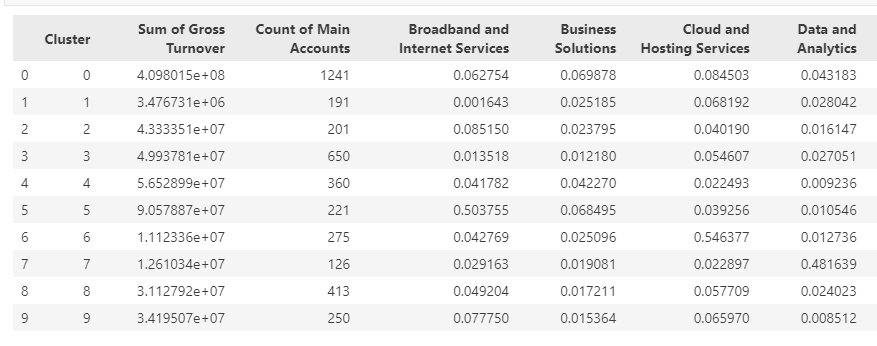

In [156]:
#Calculate total Gross Turnover per cluster
cluster_turnover = df_segment.groupby('Cluster')['Gross_Turnover'].sum().reset_index()
cluster_turnover.columns = ['Cluster', 'Sum_Gross_Turnover']

#Count unique customers per cluster
cluster_customer_count = df_segment.groupby('Cluster')['Primary_Key'].nunique().reset_index()
cluster_customer_count.columns = ['Cluster', 'Count_Customers']


In [157]:
##Calculate % share of Gross Turnover for each product category
product_share = (
    df_segment
    .groupby(['Cluster', 'ProdCat1'])['Gross_Turnover']
    .sum()
    .reset_index()
)

# Pivot it
product_share_pivot = product_share.pivot_table(
    index='Cluster',
    columns='ProdCat1',
    values='Gross_Turnover',
    fill_value=0
)

#convert to % share inside cluster
product_share_percent = product_share_pivot.div(product_share_pivot.sum(axis=1), axis=0)


In [158]:
# Combine all profiles into one final table
# Merge turnover + customer count
cluster_profile = cluster_turnover.merge(cluster_customer_count, on='Cluster')

# Merge with product share %
cluster_profile = cluster_profile.merge(product_share_percent, on='Cluster')
cluster_profile


,Cluster,Sum_Gross_Turnover,Count_Customers,Broadband and Internet Services,Business Solutions,Cloud and Hosting Services,Data and Analytics,Devices and Accessories,Digital Transformation Services,IoT and Smart Solutions,Mobile Services,Network and Infrastructure,Security and Privacy,Television and Entertainment
0,0,1.579551e+08,887,0.069507,0.032119,0.070157,0.036015,0.085937,0.207090,0.001030,0.057926,0.117983,0.017687,0.304552
1,1,2.785591e+07,561,0.018950,0.026321,0.265941,0.036209,0.041219,0.041817,0.000291,0.071233,0.173443,0.209561,0.115015
2,2,2.573868e+08,1010,0.055456,0.086476,0.062019,0.029890,0.146653,0.067351,0.011561,0.259526,0.138862,0.019835,0.122372
3,3,1.042165e+08,267,0.478480,0.065710,0.041571,0.011645,0.057855,0.085804,0.003290,0.032223,0.094881,0.005325,0.123217
4,4,1.825377e+08,1056,0.038864,0.029475,0.084671,0.036981,0.065100,0.065506,0.004732,0.087436,0.429276,0.026276,0.131682
5,5,1.309220e+07,148,0.028437,0.018728,0.025965,0.475210,0.040869,0.133291,0.000000,0.042486,0.091968,0.011361,0.131686


### 4. Prepare data for Tableau Dashboard

From here, you will be creating the visualizations in Tableau. But before, creating the required visualizations in Tableau, you should prepare the data.

Here is a reference of how data for visualizations for **Customer Segmentation** looks like:

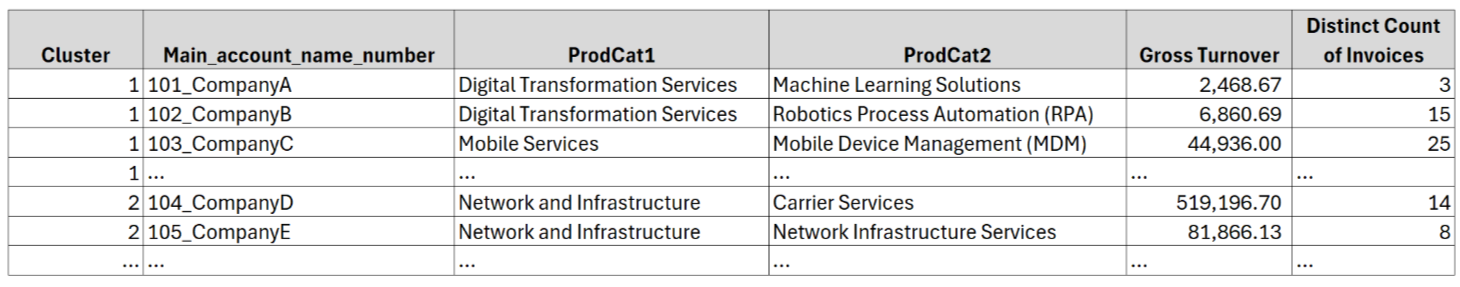






Here is a reference of how data for visualizations for **Product Categorization** looks like:

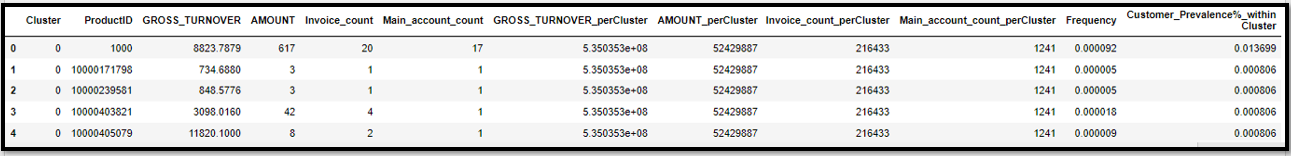

where:

- Product ID: SKU ID
- Gross Turnover (sum), Amount (sum), Invoice_count (distinct count of invoices), Main_account_count (distinct count of main accounts): fields aggregated at SKU level
- Above columns with _percluster: fields aggregated at cluster level
- Frequency (%) : number of transactions the SKU appeared on, when compared to all transactions in a cluster
- Customer Prevalence (%) within cluster : Percentage of customers within a cluster who purchase the SKU



### Dataset 1: Customer Segmentation (customer-level + category-level table)

In [159]:
df_segment

,Primary_Key,ProdCat1,Gross_Turnover,Customer Spend %,Cluster
0,100015_Customer Group_2149,Broadband and Internet Services,9250.0397,44.25,3
1,100015_Customer Group_2149,Cloud and Hosting Services,124.6860,0.60,3
2,100015_Customer Group_2149,Devices and Accessories,132.1738,0.63,3
3,100015_Customer Group_2149,Digital Transformation Services,4106.3290,19.65,3
4,100015_Customer Group_2149,Mobile Services,123.7080,0.59,3
...,...,...,...,...,...
22687,999906_Customer Group_4744,Television and Entertainment,161.3058,100.00,0
22688,999950_Customer Group_4745,Business Solutions,8925.8400,36.94,0
22689,999950_Customer Group_4745,Network and Infrastructure,3899.0720,16.13,0
22690,999950_Customer Group_4745,Security and Privacy,65.6100,0.27,0


In [160]:
##change name of the column
df_segment['Main_account_name_number'] = df_segment['Primary_Key']
df_segment

,Primary_Key,ProdCat1,Gross_Turnover,Customer Spend %,Cluster,Main_account_name_number
0,100015_Customer Group_2149,Broadband and Internet Services,9250.0397,44.25,3,100015_Customer Group_2149
1,100015_Customer Group_2149,Cloud and Hosting Services,124.6860,0.60,3,100015_Customer Group_2149
2,100015_Customer Group_2149,Devices and Accessories,132.1738,0.63,3,100015_Customer Group_2149
3,100015_Customer Group_2149,Digital Transformation Services,4106.3290,19.65,3,100015_Customer Group_2149
4,100015_Customer Group_2149,Mobile Services,123.7080,0.59,3,100015_Customer Group_2149
...,...,...,...,...,...,...
22687,999906_Customer Group_4744,Television and Entertainment,161.3058,100.00,0,999906_Customer Group_4744
22688,999950_Customer Group_4745,Business Solutions,8925.8400,36.94,0,999950_Customer Group_4745
22689,999950_Customer Group_4745,Network and Infrastructure,3899.0720,16.13,0,999950_Customer Group_4745
22690,999950_Customer Group_4745,Security and Privacy,65.6100,0.27,0,999950_Customer Group_4745


In [161]:
df_Filtered_Pareto

,INVOICE_NUMBER,INVOICE_ITEM,DOCUMENT_DATE,CUSTOMER_NUMBER,Main_account,Main_account_name,Main_resposible_employee_name,PRODUCT,Position_type_order_line,GROSS_TURNOVER,...,ProdCat1,txn_count,Invoice_flag,sku_count,SKU_flag,Year,Month,Category_Gross_Turnover,Cumulative_GT,Cumulative_GT%
0,124195645,10,2022-09-09,15082,103350,Customer Group_24,Responsible Employee_17,5737657492,ZLAG,3870.2213,...,Digital Transformation Services,1575,1,2009,1,2022,9,4.985527e+06,7.059144e+08,75.79
1,124167744,70,2022-09-07,15082,103350,Customer Group_24,Responsible Employee_17,4441429746,ZLAG,286.8075,...,Data and Analytics,1575,1,2009,1,2022,9,5.630210e+06,6.847518e+08,73.52
2,124385024,480,2022-10-10,15082,103350,Customer Group_24,Responsible Employee_17,31592006,ZLAG,52.3110,...,Television and Entertainment,1575,1,2009,1,2022,10,1.176919e+07,4.230700e+08,45.42
3,123063686,10,2022-03-02,15082,103350,Customer Group_24,Responsible Employee_17,JSF 505,ZLAG,611.5450,...,Broadband and Internet Services,1575,1,2009,1,2022,3,2.051854e+07,2.864998e+08,30.76
4,123063686,30,2022-03-02,15082,103350,Customer Group_24,Responsible Employee_17,JSF 406,ZLAG,434.4483,...,Broadband and Internet Services,1575,1,2009,1,2022,3,2.051854e+07,2.864998e+08,30.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644953,123875314,420,2022-07-14,950003,950003,Customer Group_356,Responsible Employee_23,7517900492,ZLAG,345.0000,...,Network and Infrastructure,175,1,607,1,2022,7,1.093534e+07,4.456150e+08,47.84
644954,123296377,620,2022-04-08,950003,950003,Customer Group_356,Responsible Employee_23,4486804411,ZLAG,2392.5500,...,Network and Infrastructure,175,1,607,1,2022,4,2.593824e+07,1.950870e+08,20.95
644955,123662330,480,2022-06-02,980001,980001,Customer Group_1106,Responsible Employee_7,4810002773,ZLAG,597.7800,...,Devices and Accessories,763,1,954,1,2022,6,1.233448e+07,3.991330e+08,42.85
644956,123561680,240,2022-05-02,994332,994332,Customer Group_4555,Responsible Employee_48,7857002746,ZKSK,207336.0000,...,Security and Privacy,487,1,701,1,2022,5,9.178528e+06,5.164184e+08,55.45


In [162]:
df_Filtered_Pareto.groupby('Main_account')['Main_account_name'].nunique()\
    .reset_index(name='unique_name_count')\
    .query('unique_name_count > 1')


,Main_account,unique_name_count


In [164]:
#Create a mapping between ProdCat1 and ProdCat2
prodcat_map = df_Filtered_Pareto[['ProdCat1','ProdCat2']].drop_duplicates()

#Merge ProdCat2 into df_segment
df_segment = df_segment.merge(
    prodcat_map,
    on='ProdCat1',
    how='left'
)
df_segment


,Primary_Key,ProdCat1,Gross_Turnover,Customer Spend %,Cluster,Main_account_name_number,ProdCat2
0,100015_Customer Group_2149,Broadband and Internet Services,9250.0397,44.25,3,100015_Customer Group_2149,4G Services
1,100015_Customer Group_2149,Broadband and Internet Services,9250.0397,44.25,3,100015_Customer Group_2149,Broadband Internet (Fiber)
2,100015_Customer Group_2149,Broadband and Internet Services,9250.0397,44.25,3,100015_Customer Group_2149,5G Services
3,100015_Customer Group_2149,Cloud and Hosting Services,124.6860,0.60,3,100015_Customer Group_2149,Software as a Service (SaaS)
4,100015_Customer Group_2149,Cloud and Hosting Services,124.6860,0.60,3,100015_Customer Group_2149,Application Hosting Services
...,...,...,...,...,...,...,...
155729,999950_Customer Group_4745,Television and Entertainment,11275.7742,46.66,0,999950_Customer Group_4745,Local TV Channels
155730,999950_Customer Group_4745,Television and Entertainment,11275.7742,46.66,0,999950_Customer Group_4745,Over-the-Top (OTT) Services
155731,999950_Customer Group_4745,Television and Entertainment,11275.7742,46.66,0,999950_Customer Group_4745,Educational TV Channels
155732,999950_Customer Group_4745,Television and Entertainment,11275.7742,46.66,0,999950_Customer Group_4745,News Subscription Packages


In [165]:
#Add Distinct Count of Invoices
invoice_counts = df_Filtered_Pareto.groupby(
    ['Main_account','ProdCat1']
)['INVOICE_NUMBER'].nunique().reset_index()

invoice_counts = invoice_counts.rename(
    columns={'INVOICE_NUMBER':'Distinct_Invoice_Count'}
)


In [166]:
# Convert both Main_account to string
df_segment['Main_account'] = df_segment['Primary_Key'].str.split("_").str[0].astype(str)
invoice_counts['Main_account'] = invoice_counts['Main_account'].astype(str)

# Now merge
df_segment = df_segment.merge(
    invoice_counts,
    on=['Main_account', 'ProdCat1'],
    how='left'
)

In [167]:
df_segment.columns

Index(['Primary_Key', 'ProdCat1', 'Gross_Turnover', 'Customer Spend %',
       'Cluster', 'Main_account_name_number', 'ProdCat2', 'Main_account',
       'Distinct_Invoice_Count'],
      dtype='object')

In [168]:
customer_segmentation = df_segment[[
    'Cluster',
    'Main_account_name_number',
    'ProdCat1',
    'ProdCat2',
    'Gross_Turnover',
    'Distinct_Invoice_Count'
]]

customer_segmentation

,Cluster,Main_account_name_number,ProdCat1,ProdCat2,Gross_Turnover,Distinct_Invoice_Count
0,3,100015_Customer Group_2149,Broadband and Internet Services,4G Services,9250.0397,7
1,3,100015_Customer Group_2149,Broadband and Internet Services,Broadband Internet (Fiber),9250.0397,7
2,3,100015_Customer Group_2149,Broadband and Internet Services,5G Services,9250.0397,7
3,3,100015_Customer Group_2149,Cloud and Hosting Services,Software as a Service (SaaS),124.6860,2
4,3,100015_Customer Group_2149,Cloud and Hosting Services,Application Hosting Services,124.6860,2
...,...,...,...,...,...,...
155729,0,999950_Customer Group_4745,Television and Entertainment,Local TV Channels,11275.7742,1
155730,0,999950_Customer Group_4745,Television and Entertainment,Over-the-Top (OTT) Services,11275.7742,1
155731,0,999950_Customer Group_4745,Television and Entertainment,Educational TV Channels,11275.7742,1
155732,0,999950_Customer Group_4745,Television and Entertainment,News Subscription Packages,11275.7742,1


In [169]:
customer_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155734 entries, 0 to 155733
Data columns (total 6 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Cluster                   155734 non-null  int32  
 1   Main_account_name_number  155734 non-null  object 
 2   ProdCat1                  155734 non-null  object 
 3   ProdCat2                  155734 non-null  object 
 4   Gross_Turnover            155734 non-null  float64
 5   Distinct_Invoice_Count    155734 non-null  int64  
dtypes: float64(1), int32(1), int64(1), object(3)
memory usage: 6.5+ MB


In [170]:
customer_segmentation.describe()

,Cluster,Gross_Turnover,Distinct_Invoice_Count
count,155734.000000,1.557340e+05,155734.000000
mean,2.165532,3.474197e+04,17.512367
std,1.584123,1.501954e+05,50.600611
min,0.000000,2.381600e+00,1.000000
25%,1.000000,8.348076e+02,2.000000
50%,2.000000,3.601840e+03,4.000000
75%,4.000000,1.655697e+04,13.000000
max,5.000000,1.106427e+07,2288.000000


In [171]:
customer_segmentation.to_csv("customer_segmentation.csv", index=False)


### Dataset #2 (Product Categorization)- 
    This dataset is used in Tableau to analyse SKUs, cluster-level performance, and customer prevalence.
)

In [ ]:
df_cluster_map

In [172]:
df_cluster_map.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Primary_Key  3929 non-null   object
 1   Cluster      3929 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 46.2+ KB


In [173]:
# Convert df_Filtered_Pareto Main_account to string
df_Filtered_Pareto['Main_account'] = df_Filtered_Pareto['Main_account'].astype(str)

# Convert df_cluster_map Main_account to string
df_cluster_map['Main_account'] = df_cluster_map['Primary_Key'].str.split("_").str[0].astype(str)

# Now merge
df_prod = df_Filtered_Pareto.merge(
    df_cluster_map[['Main_account','Cluster']].drop_duplicates(),
    on='Main_account',
    how='left'
)

df_prod

,INVOICE_NUMBER,INVOICE_ITEM,DOCUMENT_DATE,CUSTOMER_NUMBER,Main_account,Main_account_name,Main_resposible_employee_name,PRODUCT,Position_type_order_line,GROSS_TURNOVER,...,txn_count,Invoice_flag,sku_count,SKU_flag,Year,Month,Category_Gross_Turnover,Cumulative_GT,Cumulative_GT%,Cluster
0,124195645,10,2022-09-09,15082,103350,Customer Group_24,Responsible Employee_17,5737657492,ZLAG,3870.2213,...,1575,1,2009,1,2022,9,4.985527e+06,7.059144e+08,75.79,2
1,124167744,70,2022-09-07,15082,103350,Customer Group_24,Responsible Employee_17,4441429746,ZLAG,286.8075,...,1575,1,2009,1,2022,9,5.630210e+06,6.847518e+08,73.52,2
2,124385024,480,2022-10-10,15082,103350,Customer Group_24,Responsible Employee_17,31592006,ZLAG,52.3110,...,1575,1,2009,1,2022,10,1.176919e+07,4.230700e+08,45.42,2
3,123063686,10,2022-03-02,15082,103350,Customer Group_24,Responsible Employee_17,JSF 505,ZLAG,611.5450,...,1575,1,2009,1,2022,3,2.051854e+07,2.864998e+08,30.76,2
4,123063686,30,2022-03-02,15082,103350,Customer Group_24,Responsible Employee_17,JSF 406,ZLAG,434.4483,...,1575,1,2009,1,2022,3,2.051854e+07,2.864998e+08,30.76,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644953,123875314,420,2022-07-14,950003,950003,Customer Group_356,Responsible Employee_23,7517900492,ZLAG,345.0000,...,175,1,607,1,2022,7,1.093534e+07,4.456150e+08,47.84,0
644954,123296377,620,2022-04-08,950003,950003,Customer Group_356,Responsible Employee_23,4486804411,ZLAG,2392.5500,...,175,1,607,1,2022,4,2.593824e+07,1.950870e+08,20.95,0
644955,123662330,480,2022-06-02,980001,980001,Customer Group_1106,Responsible Employee_7,4810002773,ZLAG,597.7800,...,763,1,954,1,2022,6,1.233448e+07,3.991330e+08,42.85,4
644956,123561680,240,2022-05-02,994332,994332,Customer Group_4555,Responsible Employee_48,7857002746,ZKSK,207336.0000,...,487,1,701,1,2022,5,9.178528e+06,5.164184e+08,55.45,1


In [174]:
#Aggregate SKU + Cluster level totals 
sku_cluster = df_prod.groupby(['Cluster','PRODUCT']).agg(
    GROSS_TURNOVER=('GROSS_TURNOVER','sum'),
    AMOUNT=('AMOUNT','sum'),
    Invoice_count=('INVOICE_NUMBER','nunique'),
    Main_account_count=('Main_account','nunique')
).reset_index()
sku_cluster

,Cluster,PRODUCT,GROSS_TURNOVER,AMOUNT,Invoice_count,Main_account_count
0,0,1000,1331.3260,98,3,3
1,0,10000443808,596.8224,1,1,1
2,0,10000444091,1450.4952,2,1,1
3,0,10000444093,1409.8050,2,1,1
4,0,10000473963,1174.2000,24,1,1
...,...,...,...,...,...,...
143323,5,RIV4603,3312.2466,1,1,1
143324,5,RIVE632,1141.3608,1,1,1
143325,5,RIVE643,2142.4932,1,1,1
143326,5,RIVR12000300A,10711.9056,42,3,1


**INTEPRETATION**: 
This gives:
- Total Gross Turnover per SKU per Cluster
- Total Amount per SKU per Cluster
- Number of invoices
- Number of unique customers

In [175]:
#Add Cluster Totals (per Cluster)
cluster_totals = df_prod.groupby('Cluster').agg(
    GROSS_TURNOVER_perCluster=('GROSS_TURNOVER','sum'),
    AMOUNT_perCluster=('AMOUNT','sum'),
    Invoice_count_perCluster=('INVOICE_NUMBER','nunique'),
    Main_account_count_perCluster=('Main_account','nunique')
).reset_index()

sku_cluster = sku_cluster.merge(cluster_totals, on='Cluster', how='left')
sku_cluster


,Cluster,PRODUCT,GROSS_TURNOVER,AMOUNT,Invoice_count,Main_account_count,GROSS_TURNOVER_perCluster,AMOUNT_perCluster,Invoice_count_perCluster,Main_account_count_perCluster
0,0,1000,1331.3260,98,3,3,1.579551e+08,17665042,48796,887
1,0,10000443808,596.8224,1,1,1,1.579551e+08,17665042,48796,887
2,0,10000444091,1450.4952,2,1,1,1.579551e+08,17665042,48796,887
3,0,10000444093,1409.8050,2,1,1,1.579551e+08,17665042,48796,887
4,0,10000473963,1174.2000,24,1,1,1.579551e+08,17665042,48796,887
...,...,...,...,...,...,...,...,...,...,...
143323,5,RIV4603,3312.2466,1,1,1,1.309220e+07,860988,3293,148
143324,5,RIVE632,1141.3608,1,1,1,1.309220e+07,860988,3293,148
143325,5,RIVE643,2142.4932,1,1,1,1.309220e+07,860988,3293,148
143326,5,RIVR12000300A,10711.9056,42,3,1,1.309220e+07,860988,3293,148


In [176]:
#Add Frequency (%)
# of transactions this SKU appears in cluster  
#÷ total transactions in that cluster

# Total transactions per cluster
txn_total = df_prod.groupby('Cluster')['INVOICE_ITEM'].count().reset_index()
txn_total = txn_total.rename(columns={'INVOICE_ITEM':'total_txn_in_cluster'})

# SKU frequency count
sku_freq = df_prod.groupby(['Cluster','PRODUCT'])['INVOICE_ITEM'].count().reset_index()
sku_freq = sku_freq.rename(columns={'INVOICE_ITEM':'sku_txn_count'})

# Merge into main table
sku_cluster = sku_cluster.merge(sku_freq, on=['Cluster','PRODUCT'], how='left')
sku_cluster = sku_cluster.merge(txn_total, on='Cluster', how='left')

# Calculate percentage
sku_cluster['Frequency'] = (
    sku_cluster['sku_txn_count'] / sku_cluster['total_txn_in_cluster']
)


In [177]:
#Add Customer Prevalence (% within cluster)
cust_sku = df_prod.groupby(['Cluster','PRODUCT'])['Main_account'].nunique().reset_index()
cust_sku = cust_sku.rename(columns={'Main_account':'unique_customers_for_sku'})

# Merge
sku_cluster = sku_cluster.merge(cust_sku, on=['Cluster','PRODUCT'], how='left')

# Prevalence %
sku_cluster['Customer_Prevalence_%_within_Cluster'] = (
    sku_cluster['unique_customers_for_sku'] / sku_cluster['Main_account_count_perCluster']
)


In [178]:
sku_cluster

,Cluster,PRODUCT,GROSS_TURNOVER,AMOUNT,Invoice_count,Main_account_count,GROSS_TURNOVER_perCluster,AMOUNT_perCluster,Invoice_count_perCluster,Main_account_count_perCluster,sku_txn_count,total_txn_in_cluster,Frequency,unique_customers_for_sku,Customer_Prevalence_%_within_Cluster
0,0,1000,1331.3260,98,3,3,1.579551e+08,17665042,48796,887,3,120312,0.000025,3,0.003382
1,0,10000443808,596.8224,1,1,1,1.579551e+08,17665042,48796,887,1,120312,0.000008,1,0.001127
2,0,10000444091,1450.4952,2,1,1,1.579551e+08,17665042,48796,887,1,120312,0.000008,1,0.001127
3,0,10000444093,1409.8050,2,1,1,1.579551e+08,17665042,48796,887,1,120312,0.000008,1,0.001127
4,0,10000473963,1174.2000,24,1,1,1.579551e+08,17665042,48796,887,1,120312,0.000008,1,0.001127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143323,5,RIV4603,3312.2466,1,1,1,1.309220e+07,860988,3293,148,1,8198,0.000122,1,0.006757
143324,5,RIVE632,1141.3608,1,1,1,1.309220e+07,860988,3293,148,1,8198,0.000122,1,0.006757
143325,5,RIVE643,2142.4932,1,1,1,1.309220e+07,860988,3293,148,1,8198,0.000122,1,0.006757
143326,5,RIVR12000300A,10711.9056,42,3,1,1.309220e+07,860988,3293,148,3,8198,0.000366,1,0.006757


In [179]:
sku_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143328 entries, 0 to 143327
Data columns (total 15 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Cluster                               143328 non-null  int32  
 1   PRODUCT                               143328 non-null  object 
 2   GROSS_TURNOVER                        143328 non-null  float64
 3   AMOUNT                                143328 non-null  int64  
 4   Invoice_count                         143328 non-null  int64  
 5   Main_account_count                    143328 non-null  int64  
 6   GROSS_TURNOVER_perCluster             143328 non-null  float64
 7   AMOUNT_perCluster                     143328 non-null  int64  
 8   Invoice_count_perCluster              143328 non-null  int64  
 9   Main_account_count_perCluster         143328 non-null  int64  
 10  sku_txn_count                         143328 non-null  int64  
 11  

In [180]:
sku_cluster.describe()

,Cluster,GROSS_TURNOVER,AMOUNT,Invoice_count,Main_account_count,GROSS_TURNOVER_perCluster,AMOUNT_perCluster,Invoice_count_perCluster,Main_account_count_perCluster,sku_txn_count,total_txn_in_cluster,Frequency,unique_customers_for_sku,Customer_Prevalence_%_within_Cluster
count,143328.000000,1.433280e+05,1.433280e+05,143328.000000,143328.000000,1.433280e+05,1.433280e+05,143328.000000,143328.000000,143328.000000,143328.000000,143328.000000,143328.000000,143328.000000
mean,2.247719,5.184223e+03,4.740197e+02,4.411525,2.808509,1.717475e+08,1.539484e+07,61275.876535,848.912048,4.499874,154619.808551,0.000042,2.808509,0.003692
std,1.518818,2.747505e+04,1.101945e+04,10.243321,4.762405,7.277258e+07,5.987782e+06,27463.663402,281.311334,10.570651,72497.341695,0.000172,4.762405,0.005527
min,0.000000,1.920000e-02,1.000000e+00,1.000000,1.000000,1.309220e+07,8.609880e+05,3293.000000,148.000000,1.000000,8198.000000,0.000004,1.000000,0.000947
25%,1.000000,2.945820e+02,3.000000e+00,1.000000,1.000000,1.579551e+08,1.535653e+07,48796.000000,887.000000,1.000000,120312.000000,0.000008,1.000000,0.000990
50%,2.000000,9.143221e+02,1.100000e+01,2.000000,1.000000,1.825377e+08,1.535653e+07,79587.000000,1010.000000,2.000000,202480.000000,0.000017,1.000000,0.001980
75%,4.000000,3.018248e+03,6.800000e+01,4.000000,3.000000,2.573868e+08,2.169016e+07,87424.000000,1056.000000,4.000000,223498.000000,0.000038,3.000000,0.003788
max,5.000000,3.327486e+06,3.263962e+06,661.000000,235.000000,2.573868e+08,2.169016e+07,87424.000000,1056.000000,683.000000,223498.000000,0.031715,235.000000,0.222538


In [181]:
sku_cluster.to_csv("product_categorization.csv", index=False)


***The End***